## EDSIGH ED-TECH EXPLORATORY DATA ANALYSIS AND TIMESERIES FORECASTING

![image](https://cdn.dribbble.com/users/1741046/screenshots/14037348/the-future-of-edtech.dribbble.1a-01.png)

In [2]:
# Import Libraries for the Project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from collections import Counter
from scipy.stats import skew, kurtosis
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
import plotly.express as px
import squarify
from langdetect import detect
import re
import sys
from scipy.stats import skew, kurtosis
sys.path.append("..")
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller

# TimeSeries Forecasting
from statsmodels.tsa.arima_model import ARIMA
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet


import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
sys.path.append("..")
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
color_pal = sns.color_palette()
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
sys.path.append("..")
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller

In [306]:
# Load the DataSet
df = pd.read_csv(r"C:\Users\HENRY OKEOMA\Desktop\EdSigh ED-Tech\EdSigh Ed-Tech.csv")
df.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,4/7/2013,Free


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3676 non-null   int64  
 1   Num_Subscribers      3676 non-null   int64  
 2   Course_Title         3676 non-null   object 
 3   Price                3676 non-null   int64  
 4   Num_Review           3676 non-null   int64  
 5   Num_Lectures         3676 non-null   int64  
 6   Level                3676 non-null   object 
 7   Rating               3676 non-null   float64
 8   Content_Duration     3676 non-null   float64
 9   Published_Timestamp  3676 non-null   object 
 10  Subject              3676 non-null   object 
 11  Date_Published       3676 non-null   object 
 12  Course_Type          3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


### We have no missing values. each row seems complete

In [308]:
# Check for Duplicates
df.duplicated().sum()

0

In [309]:
# Chech for Null Values
df.isnull().sum()

Course_ID              0
Num_Subscribers        0
Course_Title           0
Price                  0
Num_Review             0
Num_Lectures           0
Level                  0
Rating                 0
Content_Duration       0
Published_Timestamp    0
Subject                0
Date_Published         0
Course_Type            0
dtype: int64

In [310]:
# Check for Data Description
df.describe().round(2)

,Course_ID,Num_Subscribers,Price,Num_Review,Num_Lectures,Rating,Content_Duration
count,3676.00,3676.00,3676.00,3676.00,3676.00,3676.00,3676.00
mean,675753.50,3199.26,66.12,156.31,40.13,0.61,4.10
std,343130.44,9486.58,61.06,935.67,50.40,0.33,6.05
min,8324.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,407474.00,112.00,20.00,4.00,15.00,0.28,1.00
50%,687692.00,912.50,45.00,18.00,25.00,0.76,2.00
75%,960814.00,2558.00,95.00,67.00,46.00,0.93,4.50
max,1282064.00,268923.00,200.00,27445.00,779.00,1.00,78.50


In [311]:
# Convert the Date to Date time object
df['Date_Published'] = pd.to_datetime(df['Date_Published'])

In [312]:
# Extract the Year, Month and Quater from Date, Also extract the First year the customer Joined
df['Year_pulished'] = df['Date_Published'].dt.year
df['Month_published'] = df['Date_Published'].dt.month
df['Month_name_published'] = df['Date_Published'].dt.month_name()
df['Day_name_published'] = df['Date_Published'].dt.day_name()
df['Quarter_published'] = df['Date_Published'].dt.quarter


df.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,2013,4,April,Saturday,2
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,2013,4,April,Sunday,2


In [313]:
# Create a season Column for Season
# Also lets create a Function and a Column to define season
def Season(x):
    if x == 'March':
        return 'Spring'
    elif x == 'April':
        return 'Spring'
    elif x == 'April':
        return 'Spring'
    elif x == 'May':
        return 'Spring'
    elif x ==  'June':
        return 'Summer'
    elif x ==  'July':
        return 'Summer'
    elif x ==  'August':
        return 'Summer'
    elif x == 'September':
        return 'Autumn'
    elif x == 'October':
        return 'Autumn' 
    elif x == 'November':
        return 'Autumn'
    elif x == 'December':
        return 'Winter'
    elif x == 'January':
        return 'Winter'
    elif x == 'February':
        return 'Winter'

df['Season'] = df['Month_name_published'].apply(Season)
df.head(3)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,2013,4,April,Saturday,2,Spring
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,2013,4,April,Sunday,2,Spring
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,2013-12-25,Free,2013,12,December,Wednesday,4,Winter


In [314]:
# Chech for Unique course Titles
df["Course_Title"].unique()

array(['Bitcoin or How I Learned to Stop Worrying and Love Crypto',
       'Accounting in 60 Minutes - A Brief Introduction',
       'Stock Market Investing for Beginners', ...,
       'Essentials of Spring 5.0 for Developers',
       'Display and analyze GIS data on the web with Leaflet.js',
       'Learning Path: Web Applications with Spring and Angular'],
      dtype=object)

In [315]:
# Specify the column for which to print unique values
column_to_check = 'Course_Title'

# Get the unique values of the specified column
unique_values = df[column_to_check].unique()

# Print the unique values
print(f"Unique values in '{column_to_check}':")
for value in unique_values:
    print(value)

Unique values in 'Course_Title':
Bitcoin or How I Learned to Stop Worrying and Love Crypto
Accounting in 60 Minutes - A Brief Introduction
Stock Market Investing for Beginners
Introduction to Financial Modeling
The Complete Financial Analyst Course 2017
Forex Basics
Beginner to Pro in Excel: Financial Modeling and Valuation
Black Algo Trading: Build Your Trading Robot
Financial Analysis: A Recipe for Success
Stock Market Foundations
Financial Accounting - A Brief Introduction
Fundamentals of Forex Trading
Forex Trading A-Z™ - With LIVE Examples of Forex Trading
Learn to Trade for Profit:Trading with Japanese Candlesticks
Options Trading Introduction: Day Trade Stock Options
Introduction to Digital Payments
Introduction to Accounting: The Language of Business
Corporate Finance - A Brief Introduction
CPA 101: How To Master Affiliate Marketing In No Time
Introduction to Finance, Accounting, Modeling and Valuation
Bitcoin For Beginners: Your Quick Start Guide To Bitcoin
Learn to Trade for 

### It is worthy to note that few books titles not in English, we shall check how many they are below and also see what is there response separately

In [316]:
# Function to check if a string contains non-English characters
def contains_non_english(text):
    pattern = re.compile(r'[^\x00-\x7F]+')  # Matches any non-ASCII characters
    return bool(pattern.search(text))

In [317]:
# Filter non-English titles
non_english_titles = df[df['Course_Title'].apply(contains_non_english)]

In [318]:
# Display the output
non_english_titles.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season
12,308690,16900,Forex Trading A-Z™ - With LIVE Examples of For...,195,2476,52,Beginner Level,0.16,5.5,2014-12-12T23:58:39Z,Business Finance,2014-12-12,Paid,2014,12,December,Friday,4,Winter
45,1005312,7183,【１日でマスター！】今日からはじめる資産形成,20,819,14,All Levels,0.72,1.0,2017-01-19T23:51:32Z,Business Finance,2017-01-19,Paid,2017,1,January,Thursday,1,Winter


### We have filtered all our course title with special characters

In [319]:
# Count unique course Titles
df["Course_Title"].nunique()

3663

In [320]:
# List Unique Course Level in the Data
df["Level"].unique()

array(['All Levels', 'Beginner Level', 'Intermediate Level',
       'Expert Level'], dtype=object)

In [321]:
# List Unique Subject in the Data
df["Subject"].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [322]:
# We have some data points with zero subsription
zero_s = df[df['Num_Subscribers'] == 0].head(3)
zero_s

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season
1155,1221942,0,Basic Bookkeeping,35,0,12,Beginner Level,0.40,0.733333,2017-05-23T16:20:18Z,Business Finance,2017-05-23,Paid,2017,5,May,Tuesday,2,Spring
1156,1276182,0,Options Trading Foundation: Your journey to co...,95,0,5,All Levels,0.94,1.000000,2017-07-05T04:41:54Z,Business Finance,2017-07-05,Paid,2017,7,July,Wednesday,3,Summer
1157,1232312,0,Core Financial Statement Concepts,50,0,9,All Levels,0.78,1.500000,2017-06-28T21:58:15Z,Business Finance,2017-06-28,Paid,2017,6,June,Wednesday,2,Summer


In [323]:
zero_subscribers_courses = df[df['Num_Subscribers'] == 0].groupby('Course_Title').size().reset_index(name='Count')
zero_subscribers_courses

,Course_Title,Count
0,4 Week Rhythm Mastery,1
1,60 Minutes to Fundamental Accounting Skills,1
2,ABRSM Grade III Piano Class - Handel Sonatina ...,1
3,Accounting - The 6 most important rules you mu...,1
4,Adobe Photoshop pentru Social Media,1
...,...,...
60,Tune that Sour Note on Your Piano,1
61,Understand Core Finance Principles in 60 Minutes,1
62,Understanding Financial Statements,1
63,Workshop on Banking Credit Analysis Process,1


### 65 Courses have 0 subscriptions

In [324]:
# Check the Course_IDs, some may be duplicated
df['Course_ID'].value_counts()

1052304    2
142666     2
241590     2
736940     2
195196     1
          ..
507726     1
516394     1
1149656    1
337072     1
1270222    1
Name: Course_ID, Length: 3672, dtype: int64

### We have some course_id which are duplicated, this isnt correct, we shall investigate and drop each

In [325]:
# Call the DataFrame where the course_ID is duplicated
duplicated_courses = df[(df['Course_ID'] == 1052304) | (df['Course_ID'] == 142666) | (df['Course_ID'] == 241590) | (df['Course_ID'] == 736940)]
duplicated_courses

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season
2645,1052304,11285,JavaScript For Beginners : Learn JavaScript Fr...,195,102,77,Intermediate Level,0.30,5.5,2017-02-07T17:20:39Z,Web Development,2017-02-07,Paid,2017,2,February,Tuesday,1,Winter
2647,736940,11170,Practical CSS Website Development: Crash Course,95,35,19,Beginner Level,0.11,2.5,2016-02-02T21:05:27Z,Web Development,2016-02-02,Paid,2016,2,February,Tuesday,1,Winter
2648,241590,11167,Make a professional website - 30 Day Guarantee...,20,34,13,Beginner Level,0.68,2.0,2014-06-23T16:03:41Z,Web Development,2014-06-23,Paid,2014,6,June,Monday,2,Summer
2650,142666,11026,Improved SEO with Rich Snippets and MicroData,0,228,13,Beginner Level,0.80,1.0,2014-06-09T10:35:40Z,Web Development,2014-06-09,Free,2014,6,June,Monday,2,Summer
3022,1052304,11285,JavaScript For Beginners : Learn JavaScript Fr...,195,102,77,Intermediate Level,0.92,5.5,2017-02-07T17:20:39Z,Web Development,2017-02-07,Paid,2017,2,February,Tuesday,1,Winter
3023,736940,11170,Practical CSS Website Development: Crash Course,95,35,19,Beginner Level,0.92,2.5,2016-02-02T21:05:27Z,Web Development,2016-02-02,Paid,2016,2,February,Tuesday,1,Winter
3024,241590,11167,Make a professional website - 30 Day Guarantee...,20,34,13,Beginner Level,0.92,2.0,2014-06-23T16:03:41Z,Web Development,2014-06-23,Paid,2014,6,June,Monday,2,Summer
3025,142666,11026,Improved SEO with Rich Snippets and MicroData,0,228,13,Beginner Level,0.92,1.0,2014-06-09T10:35:40Z,Web Development,2014-06-09,Free,2014,6,June,Monday,2,Summer


### The above courses are duplicated in the dataframe, we shall drop one of each on our dataframe to make our analysis as accurate as possible

In [326]:
df.drop([2645, 2647, 2648, 2650], axis=0, inplace=True)

In [327]:
df['Course_ID'].value_counts()

49798      1
383852     1
632234     1
847808     1
785210     1
          ..
507726     1
516394     1
1149656    1
337072     1
1270222    1
Name: Course_ID, Length: 3672, dtype: int64

In [328]:
duplicated_courses = df[(df['Course_ID'] == 1052304) | (df['Course_ID'] == 142666) | (df['Course_ID'] == 241590) | (df['Course_ID'] == 736940)]
duplicated_courses

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season
3022,1052304,11285,JavaScript For Beginners : Learn JavaScript Fr...,195,102,77,Intermediate Level,0.92,5.5,2017-02-07T17:20:39Z,Web Development,2017-02-07,Paid,2017,2,February,Tuesday,1,Winter
3023,736940,11170,Practical CSS Website Development: Crash Course,95,35,19,Beginner Level,0.92,2.5,2016-02-02T21:05:27Z,Web Development,2016-02-02,Paid,2016,2,February,Tuesday,1,Winter
3024,241590,11167,Make a professional website - 30 Day Guarantee...,20,34,13,Beginner Level,0.92,2.0,2014-06-23T16:03:41Z,Web Development,2014-06-23,Paid,2014,6,June,Monday,2,Summer
3025,142666,11026,Improved SEO with Rich Snippets and MicroData,0,228,13,Beginner Level,0.92,1.0,2014-06-09T10:35:40Z,Web Development,2014-06-09,Free,2014,6,June,Monday,2,Summer


### We have dropped the duplicates on the Course_ID columns

In [26]:
# We shall create a revenue column using the number of subscribers and price, so that we can determine
# which books we are making most revenue by multiplying the number of subscribers with price

df['Revenue'] = df['Num_Subscribers']*df['Price']
df.head(3)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season,Revenue
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,2013,4,April,Saturday,2,Spring,0
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,2013,4,April,Sunday,2,Spring,0
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,2013-12-25,Free,2013,12,December,Wednesday,4,Winter,0


### We have created a new column for revenue calculations


# Univariate Analysis

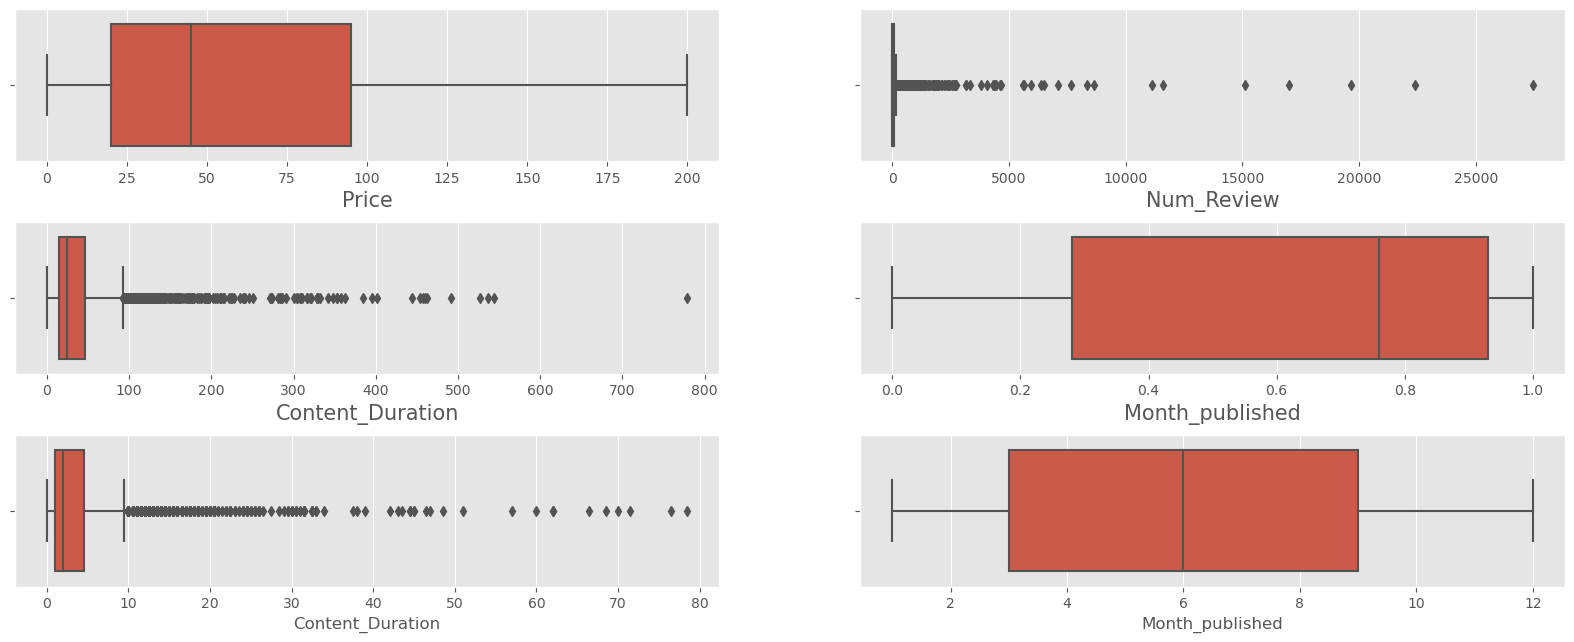

In [27]:
# We shall use the boxplot to visisualise all the numerical columns. This will enable us to point areas 
# we may find useful insights

fig, axs = plt.subplots(3,2, figsize = (20,7.5))
plt1 = sns.boxplot(x = df['Price'], ax = axs[0,0])
plt2 = sns.boxplot(x= df['Num_Review'], ax = axs[0,1])
plt3 = sns.boxplot(x = df['Num_Lectures'], ax = axs[1,0])
plt4 = sns.boxplot(x = df['Rating'], ax = axs[1,1])
plt5 = sns.boxplot(x= df['Content_Duration'], ax = axs[2,0])
plt6 = sns.boxplot(x = df['Month_published'], ax = axs[2,1])

# Increase the label font size
plt1.set_xlabel('Price', fontsize=15)
plt2.set_xlabel('Num_Review', fontsize=15)
plt3.set_xlabel('Num_Lectures', fontsize=15)
plt4.set_xlabel('Rating', fontsize=15)
plt3.set_xlabel('Content_Duration', fontsize=15)
plt4.set_xlabel('Month_published', fontsize=15)

plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
plt.show()


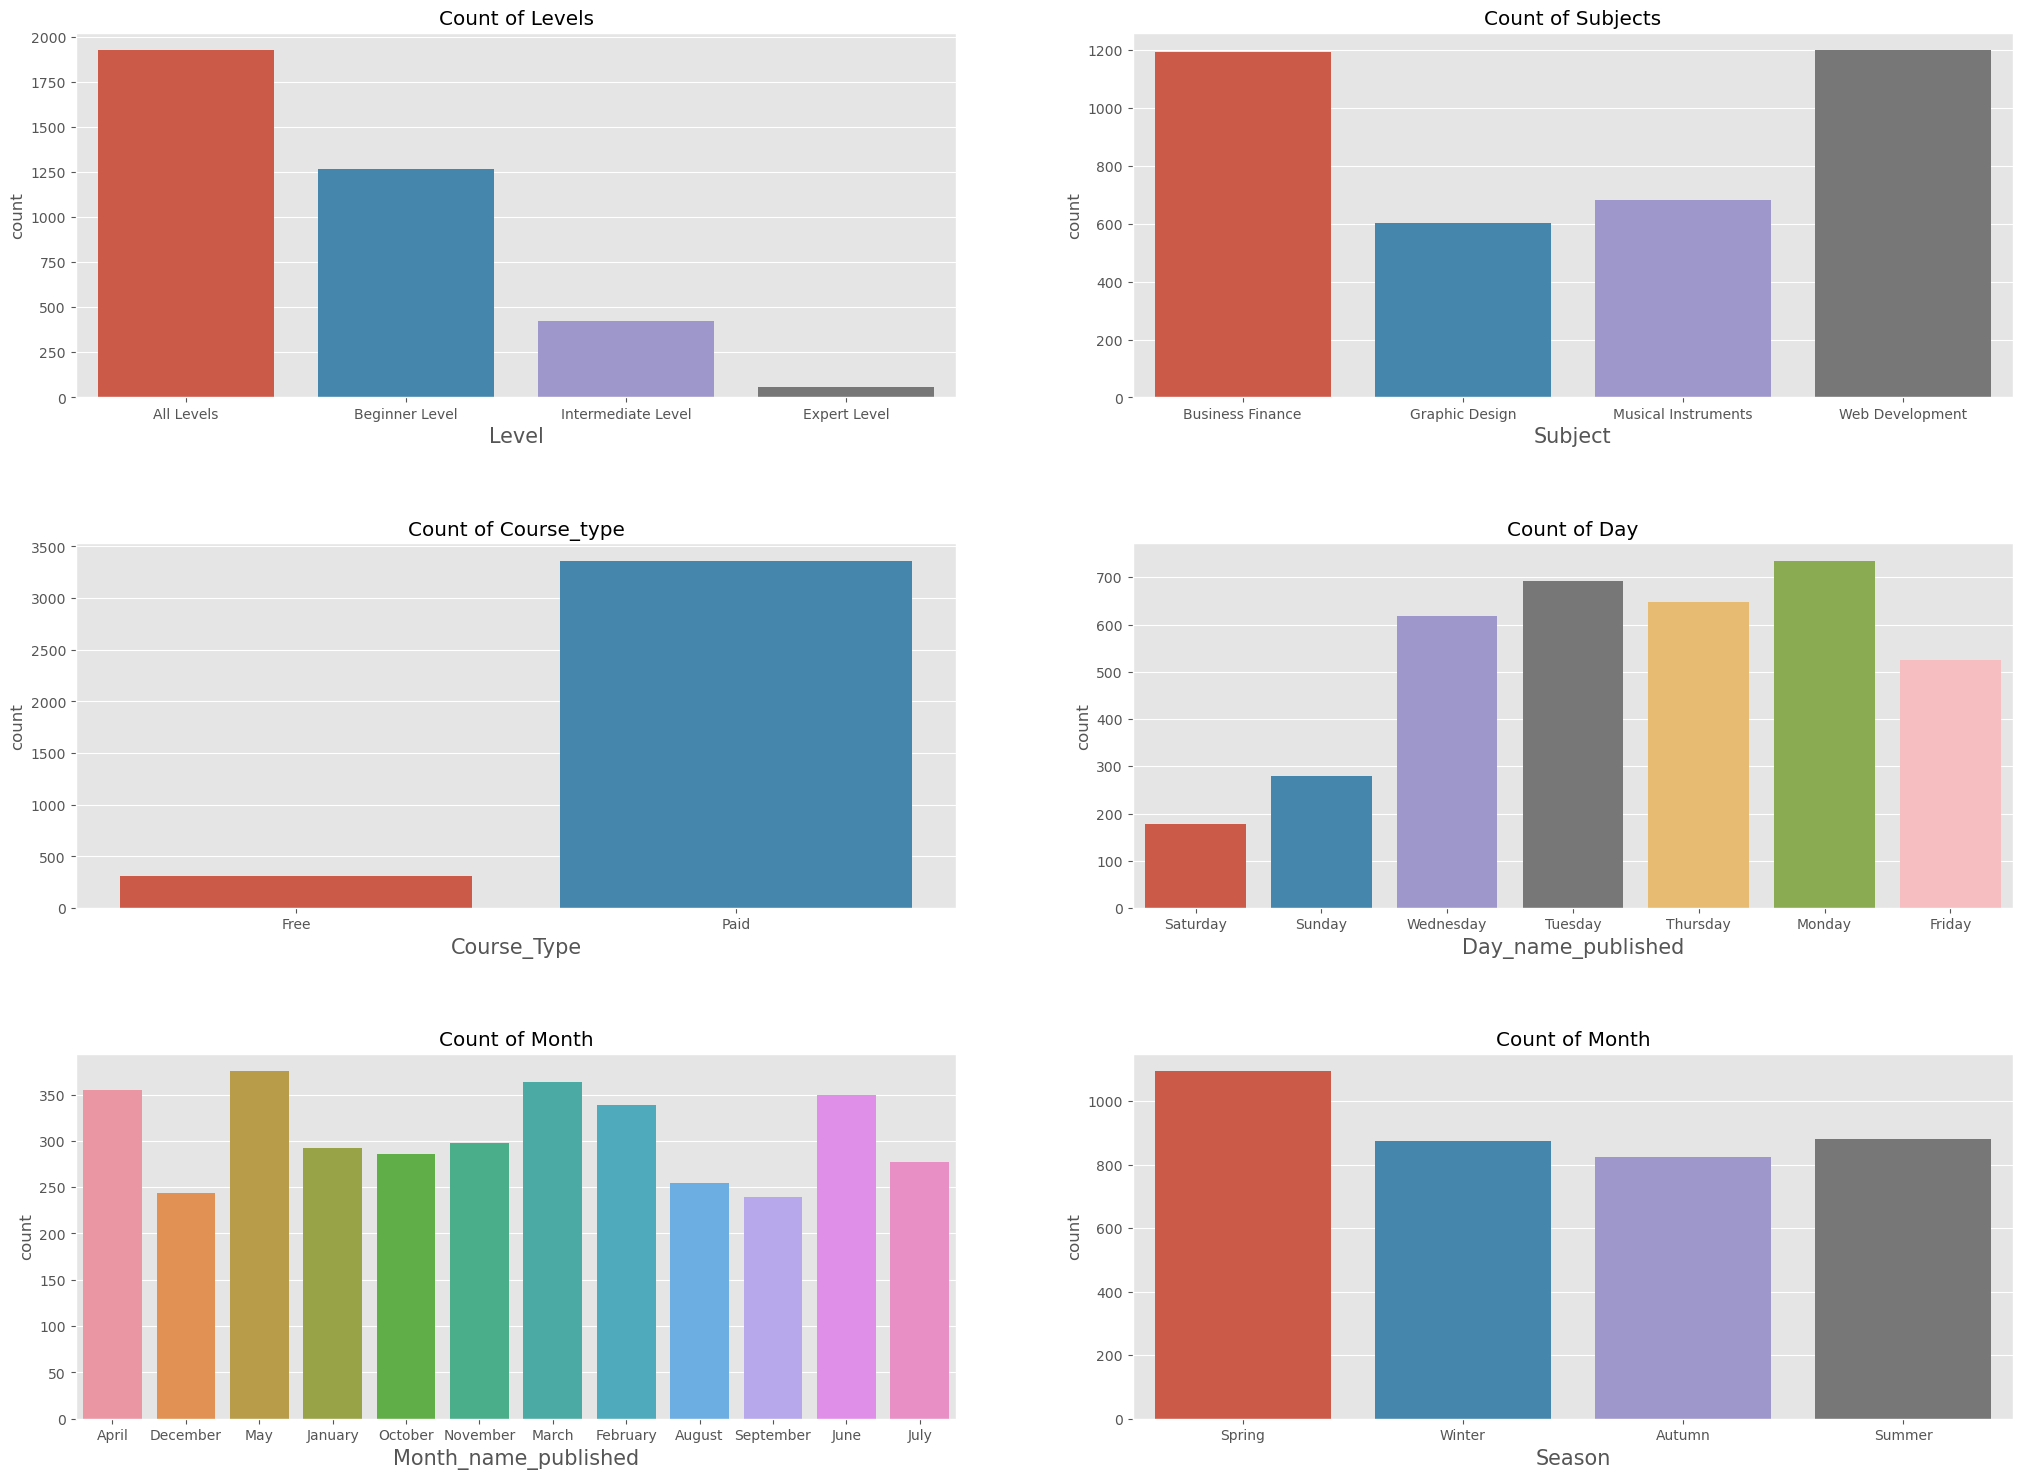

In [28]:
#We shall use the Barplot to visualise the Categorical columns

fig, axs = plt.subplots(3,2, figsize = (25,18))

axs[0,0].set_title('Count of Levels')
plt1 = sns.countplot(x = df['Level'], data=df, ax = axs[0,0])

axs[0,1].set_title('Count of Subjects')
plt2 = sns.countplot(x= df['Subject'],data=df, ax = axs[0,1])


axs[1,0].set_title('Count of Course_type')
plt3 = sns.countplot(x = df['Course_Type'], data=df, ax = axs[1,0])


axs[1,1].set_title('Count of Day')
plt4 = sns.countplot(x = df['Day_name_published'],data=df, ax = axs[1,1])

plt.title('Count of Month')
axs[2,0].set_title('Count of Month')
plt5 = sns.countplot(x= df['Month_name_published'],data=df, ax = axs[2,0])


axs[2,1].set_title('Count of Month')
plt6 = sns.countplot(x = df['Season'],data=df, ax = axs[2,1])

# Increase the label font size
plt1.set_xlabel('Level', fontsize=15)
plt2.set_xlabel('Subject', fontsize=15)
plt3.set_xlabel('Course_Type', fontsize=15)
plt4.set_xlabel('Day_name_published', fontsize=15)
plt5.set_xlabel('Month_name_published', fontsize=15)
plt6.set_xlabel('Season', fontsize=15)

plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
plt.show()

### All levels and beginners level are the most in numbers.

### Business and web development are most prominent courses overall

### Most of the courses are paid for

### As regards to days of publications, Mondays-Thursdays are the busiest. Friday and weekend are very minimal

### As regards to the month of publications,, March, April, Month and June are the highest and publications is most in the sping

# Bivariate and Multivariate Analysis

In [29]:
df.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season,Revenue
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,2013,4,April,Saturday,2,Spring,0
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,2013,4,April,Sunday,2,Spring,0


In [30]:
# We shall group the Level and Subject and take the Sum for the Prices and Revenue
L_S = df.groupby(['Level','Subject'])['Price','Revenue'].sum().reset_index()
L_S

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_1788\357043680.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  L_S = df.groupby(['Level','Subject'])['Price','Revenue'].sum().reset_index()


,Level,Subject,Price,Revenue
0,All Levels,Business Finance,44435,69837715
1,All Levels,Graphic Design,20810,52388850
2,All Levels,Musical Instruments,16065,23031730
3,All Levels,Web Development,47190,294407915
4,Beginner Level,Business Finance,27425,35578315
5,Beginner Level,Graphic Design,9325,18592325
6,Beginner Level,Musical Instruments,13030,25429895
7,Beginner Level,Web Development,33030,261261145
8,Expert Level,Business Finance,1645,2709565
9,Expert Level,Graphic Design,200,164210


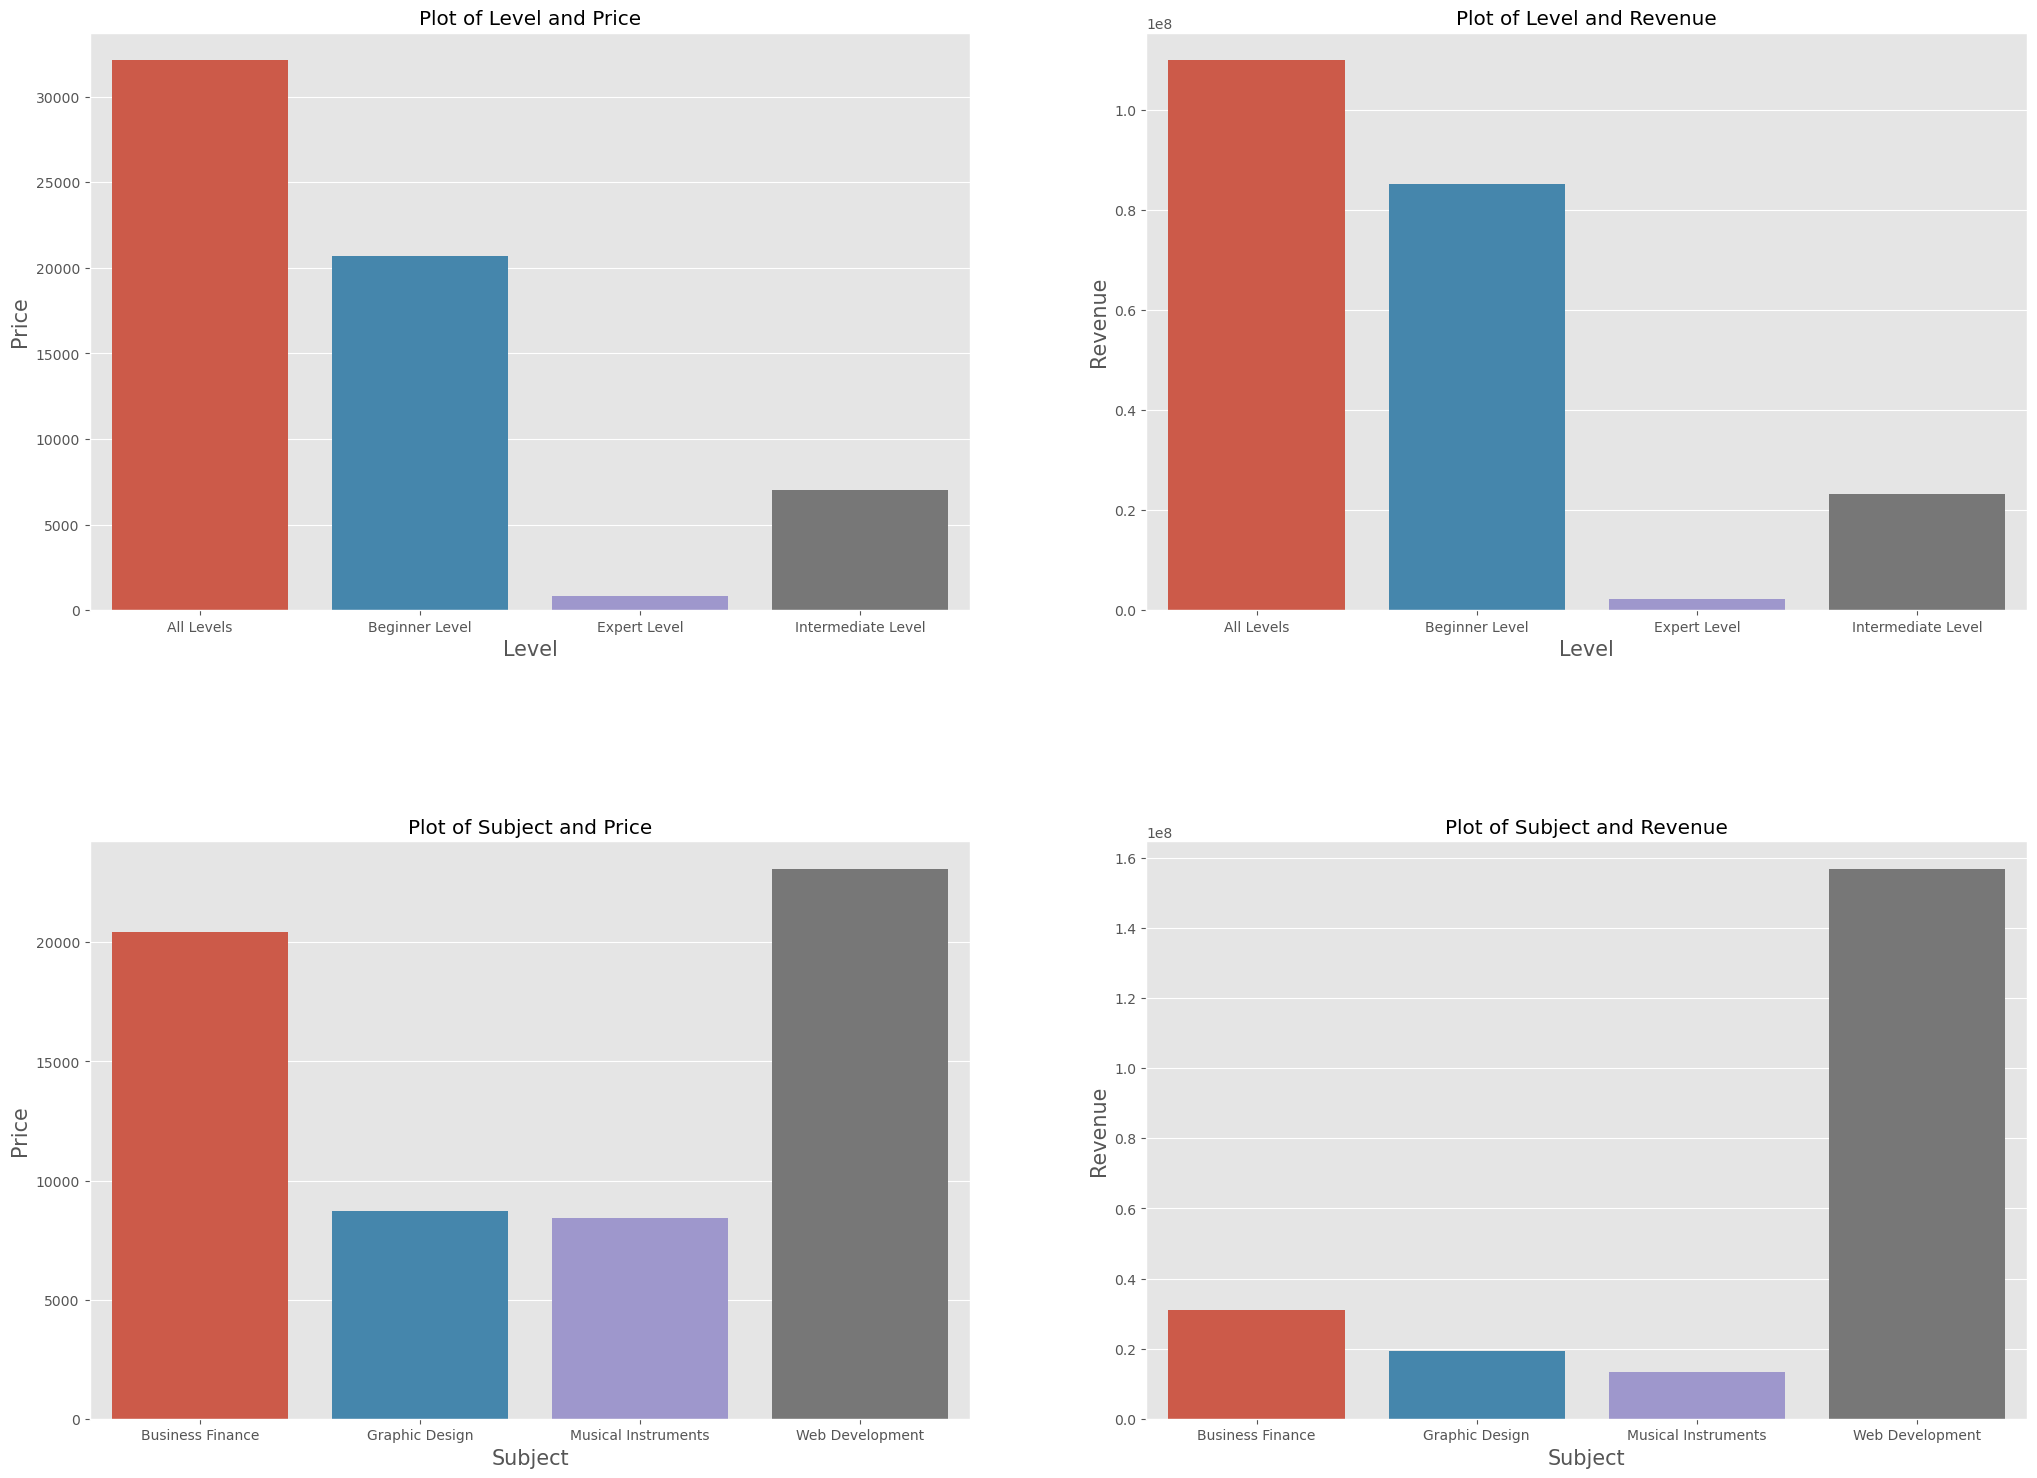

In [31]:
fig, axs = plt.subplots(2,2, figsize = (25,18))

axs[0,0].set_title('Plot of Level and Price')
plt1 = sns.barplot(x ='Level', y='Price', data=L_S, ci=None, ax = axs[0,0])

axs[0,1].set_title('Plot of Level and Revenue')
plt2 = sns.barplot(x= 'Level', y='Revenue', data=L_S, ci=None, ax = axs[0,1])

axs[1,0].set_title('Plot of Subject and Price')
plt3 = sns.barplot(x = 'Subject', y='Price', data=L_S, ci=None, ax = axs[1,0])

axs[1,1].set_title('Plot of Subject and Revenue')
plt4 = sns.barplot(x = 'Subject', y='Revenue', data=L_S, ci=None, ax = axs[1,1])


# Increase the label font size
plt1.set_xlabel('Level', fontsize=15)
plt1.set_ylabel('Price', fontsize=15)
plt2.set_xlabel('Level', fontsize=15)
plt2.set_ylabel('Revenue', fontsize=15)
plt3.set_xlabel('Subject', fontsize=15)
plt3.set_ylabel('Price', fontsize=15)
plt4.set_xlabel('Subject', fontsize=15)
plt4.set_ylabel('Revenue', fontsize=15)

plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots
plt.show()


### The Levels are corresponding with respect to Price and their Revenue

### The Subjects are not corresponding in terms of Price and  Revenue. In fact Business Finance is high in prices, but does not get good patronage and its revenue is very minimal; which implies minimal subscriptions to users

### We have to investigate why Business Finance if returning Low Revenue, lets compare this with their ratings

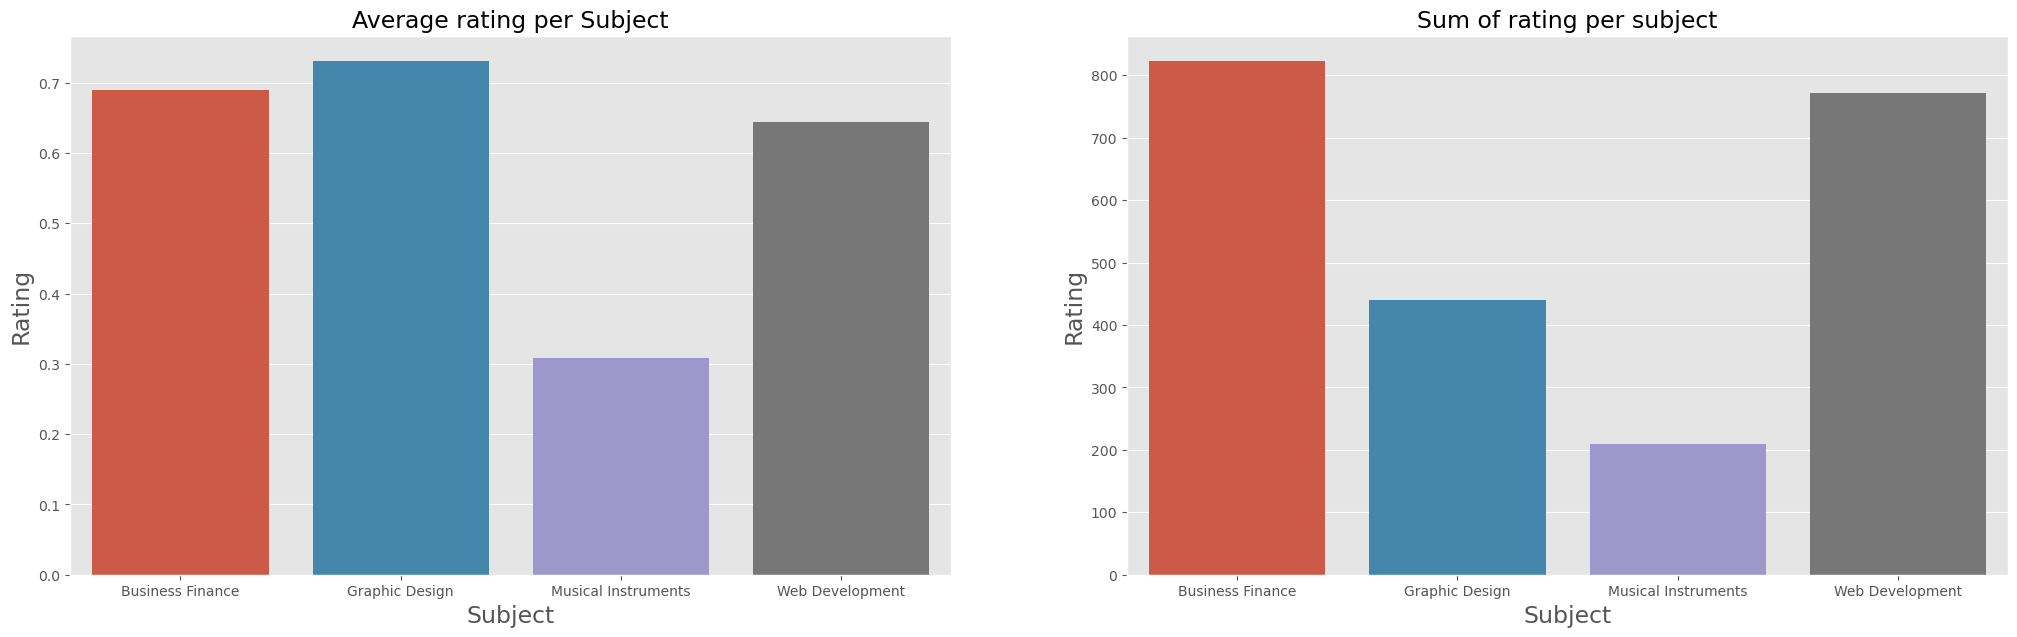

In [32]:
# Plot of Subject and Rating to see how The Subjects are rated
sub_rating = df.groupby('Subject')['Rating'].mean().reset_index()
sub_rating1 = df.groupby('Subject')['Rating'].sum().reset_index()


fig, axs = plt.subplots(1,2, figsize = (25,7))

axs[0].set_title('Average rating per Subject', fontsize=17)
plt1 = sns.barplot(x = 'Subject', y='Rating', data=sub_rating, ax = axs[0])

axs[1].set_title('Sum of rating per subject', fontsize=17)
plt2 = sns.barplot(x= 'Subject', y= 'Rating', data=sub_rating1, ax = axs[1])

# Increase the label font size
plt1.set_xlabel('Subject', fontsize=17)
plt1.set_ylabel('Rating', fontsize=17)

plt2.set_xlabel('Subject', fontsize=17)
plt2.set_ylabel('Rating', fontsize=17);

### Business finance have a good rating both by summation and by average

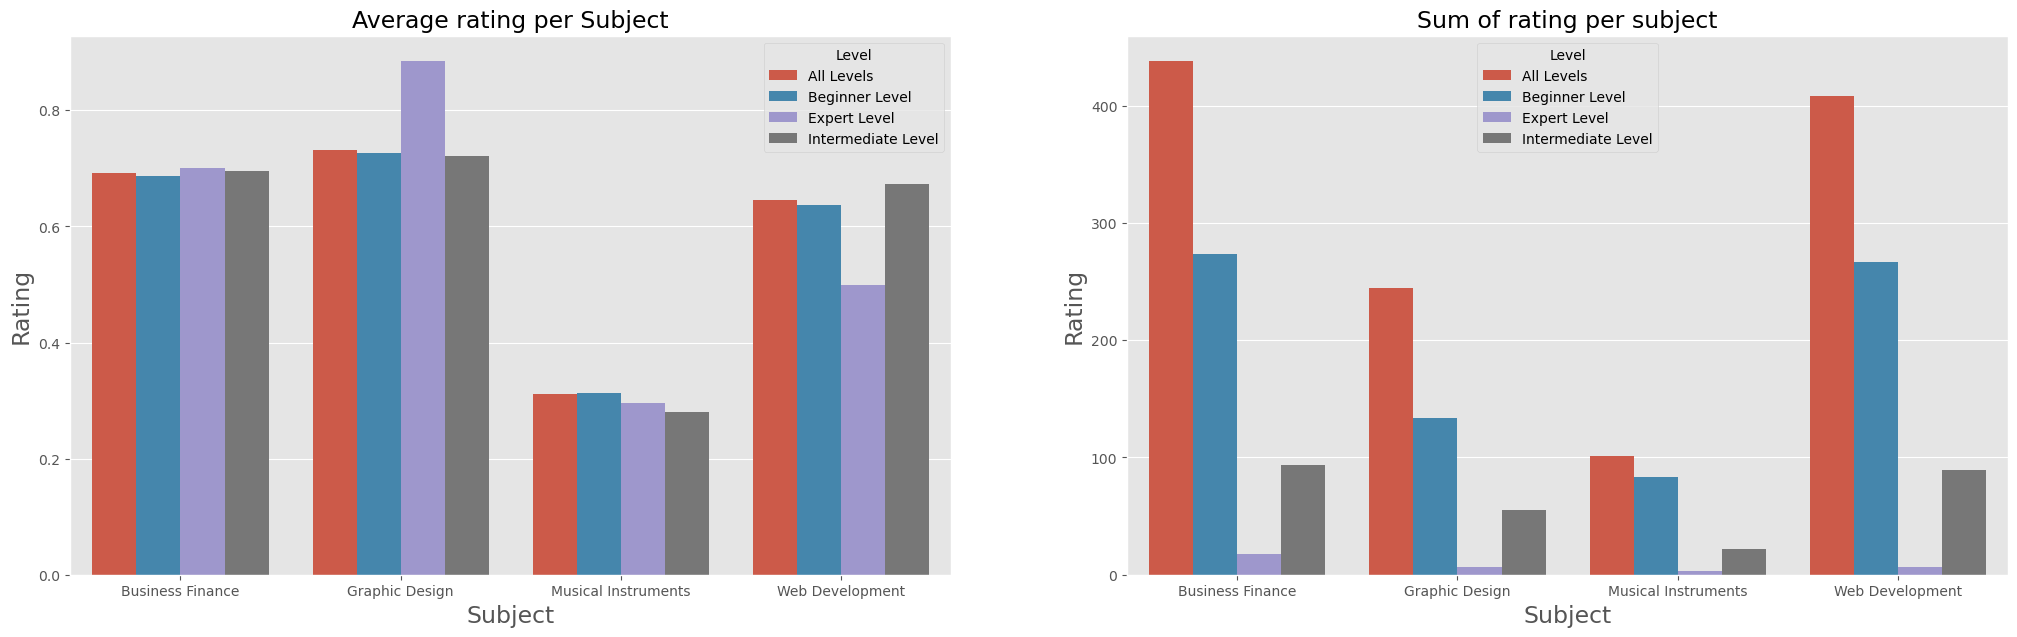

In [33]:


# Also checking if the Level of complexity is affecting low subscription for Business Finance Courses as they have high
# ratings above


# Check the Subjects and Level with the ratings
z = df.groupby(['Subject','Level'])['Rating'].mean().reset_index()
z1 = df.groupby(['Subject','Level'])['Rating'].sum().reset_index()

fig, axs = plt.subplots(1,2, figsize = (25,7))

axs[0].set_title('Average rating per Subject', fontsize=17)
plt1 = sns.barplot(x = 'Subject', y='Rating', data=z, hue='Level', ax = axs[0])

axs[1].set_title('Sum of rating per subject', fontsize=17)
plt2 = sns.barplot(x= 'Subject', y= 'Rating', hue='Level', data=z1, ax = axs[1])

# Increase the label font size
plt1.set_xlabel('Subject', fontsize=17)
plt1.set_ylabel('Rating', fontsize=17)

plt2.set_xlabel('Subject', fontsize=17)
plt2.set_ylabel('Rating', fontsize=17);


### We have a consistent level as regards to average ratings, also business finance have highest ratings across all the subject levels 

### Checking for Top 10 Courses mostly Subscribed. We shall filter the dataframe to exclude courses with zero subscriptions

In [34]:
# Filter out rows with zero subscribers
filtered_df = df[df['Num_Subscribers'] > 0]
filtered_df.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season,Revenue
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,2013,4,April,Saturday,2,Spring,0
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,2013,4,April,Sunday,2,Spring,0


In [35]:
# We shall investigate the Top and Bottom 10 Course_Titles by their Numbers of Suscribers
# Sort the courses by the number of subscribers in descending order
popular_courses = filtered_df.sort_values(by='Num_Subscribers', ascending=False)

# Display the top 10 courses with the highest number of subscribers
top_10_courses = popular_courses.head(10)
print(top_10_courses[['Course_Title', 'Num_Subscribers']])

                                           Course_Title  Num_Subscribers
2473               Learn HTML5 Programming From Scratch           268923
2474                     Coding for Entrepreneurs Basic           161029
2475                         The Web Developer Bootcamp           121584
2476  Build Your First Website in 1 Week with HTML5 ...           120291
2477              The Complete Web Developer Course 2.0           114512
1793              Free Beginner Electric Guitar Lessons           101154
2478  Web Design for Web Developers: Build Beautiful...            98867
2479             Learn Javascript & JQuery From Scratch            84897
2480  Practical PHP: Master the Basics and Code Dyna...            83737
2481          JavaScript: Understanding the Weird Parts            79612


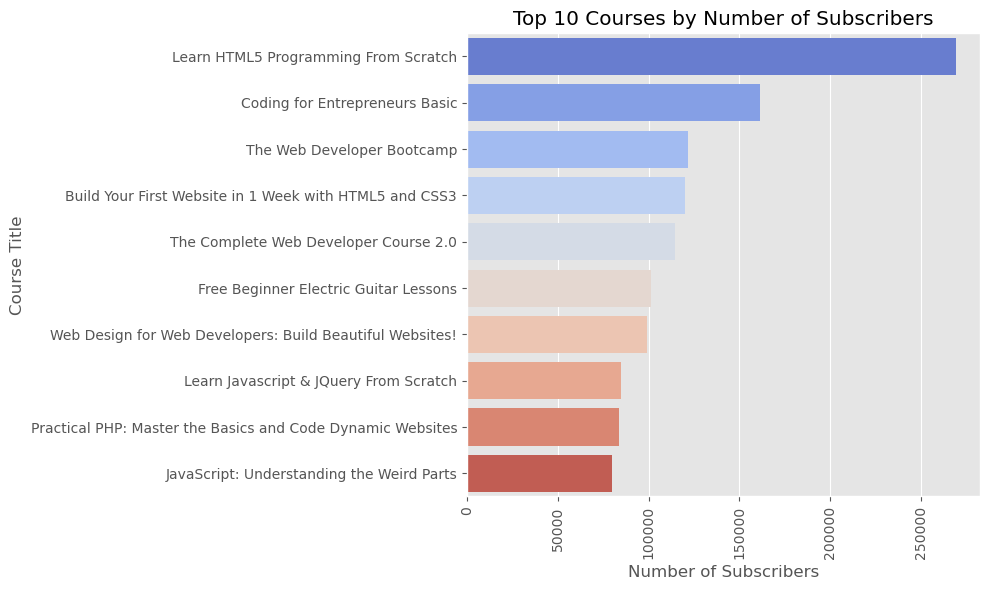

In [36]:
# Visualize the number of subscribers for the top 10 courses
plt.figure(figsize=(10, 6))
sns.barplot(data = top_10_courses, y= top_10_courses['Course_Title'], x= top_10_courses['Num_Subscribers'],\
            palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.title('Top 10 Courses by Number of Subscribers')
plt.tight_layout()
plt.show()

### Learn HTML, coding book and web developers is the top 3 subscribed books

In [37]:
# Sort the courses by the number of subscribers in descending order
least_courses = filtered_df.sort_values(by='Num_Subscribers', ascending=False)

# Display the bottom 10 courses with the highest number of subscribers
bottom_10_courses = least_courses.tail(10)
print(bottom_10_courses[['Course_Title', 'Num_Subscribers']])

                                           Course_Title  Num_Subscribers
1766                       誰でもわかる Adobe Illustrator CS5                1
1765                         誰でもわかる Adobe Photoshop CS5                1
1764                      Uso Básico de Adobe Photoshop                1
1763         After Effects - Alles rund um das Tracking                1
1762          Crea personajes fantásticos con Photoshop                1
1761             Corel Draw X8 Başlangıç Eğitimi (YENİ)                1
1760         Wordpress: Comment utiliser le thème FABLE                1
1148                             Psicología del trading                1
1758  دورة شامل لبرنامج إلستريتور للمبتدئين - Adobe ...                1
2461  Learn Loreena McKennitt Songs-Quicklessons Pia...                1


### These courses_titles were subsribed only once

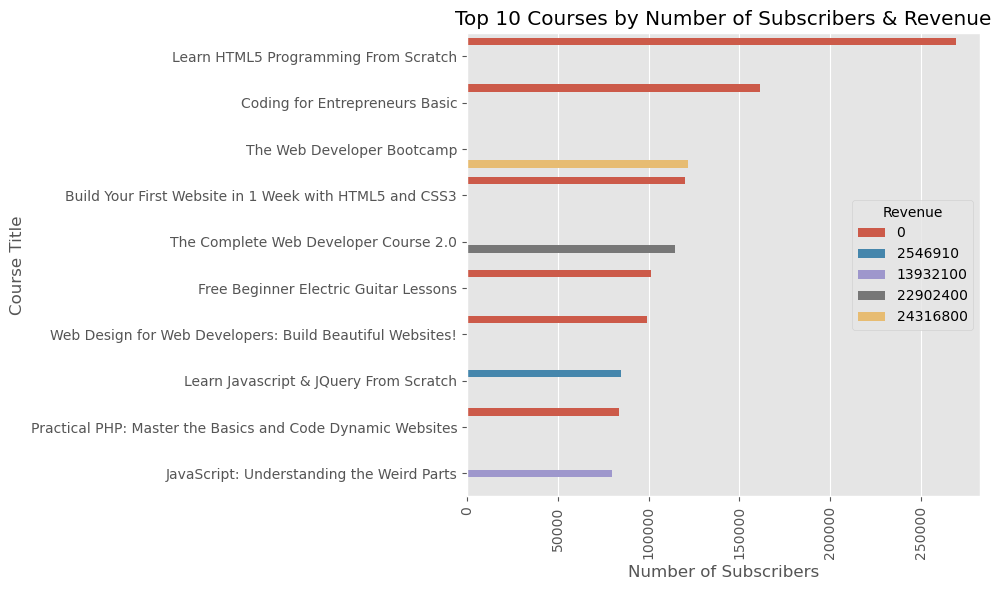

In [38]:
# We shall compare this by Rating, Revenue and Course_type

# Visualize the number of subscribers for the top 10 courses by Rating
plt.figure(figsize=(10, 6))
sns.barplot(data = top_10_courses, hue='Revenue', y= top_10_courses['Course_Title'], x= top_10_courses['Num_Subscribers'])
plt.xticks(rotation=90)
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.title('Top 10 Courses by Number of Subscribers & Revenue')
plt.tight_layout()
plt.show()

### The web development courses are returning the highest revenue from the top 10 courses subcribed

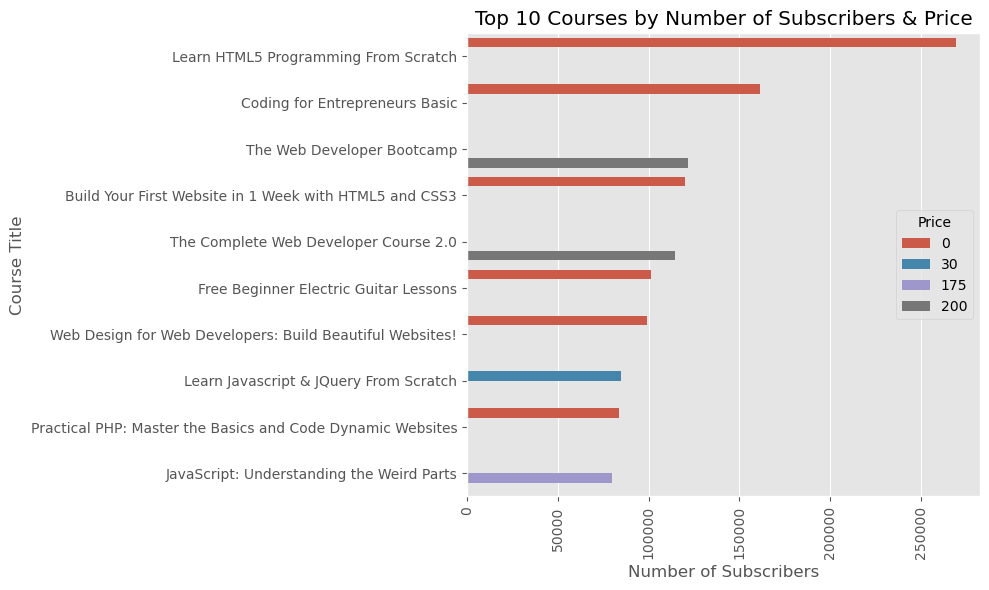

In [39]:
# We shall compare this by Price, Top_10 Course_Title and Number of Subscribers

# Visualize the number of subscribers for the top 10 courses by Rating
plt.figure(figsize=(10, 6))
sns.barplot(data = top_10_courses, hue='Price', y= top_10_courses['Course_Title'], x= top_10_courses['Num_Subscribers'])
plt.xticks(rotation=90)
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.title('Top 10 Courses by Number of Subscribers & Price')
plt.tight_layout()
plt.show()

### Web development course 2.0 and Javascript have the highest prices

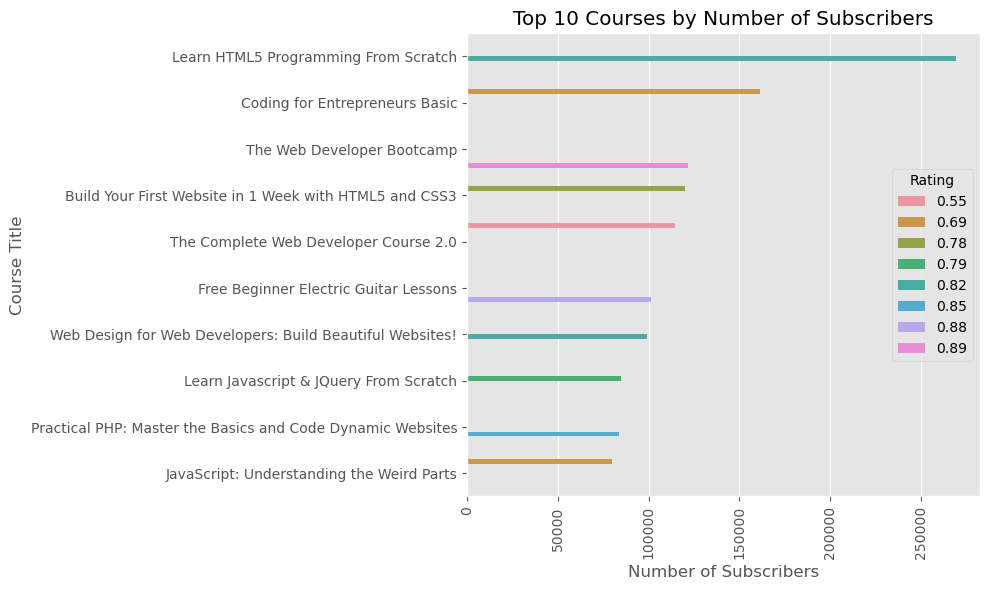

In [40]:
# We shall compare this by Rating, Revenue and Course_type

# Visualize the number of subscribers for the top 10 courses by Rating
plt.figure(figsize=(10, 6))
sns.barplot(data = top_10_courses, hue='Rating', y= top_10_courses['Course_Title'], x= top_10_courses['Num_Subscribers'])
plt.xticks(rotation=90)
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.title('Top 10 Courses by Number of Subscribers')
plt.tight_layout()
plt.show()

### by rating, Web developer, Free beginners guitar lessens &web designs have the highest ratings on the top 10 courses

### The web development as a subject is giving the highest revenue followed by business finance

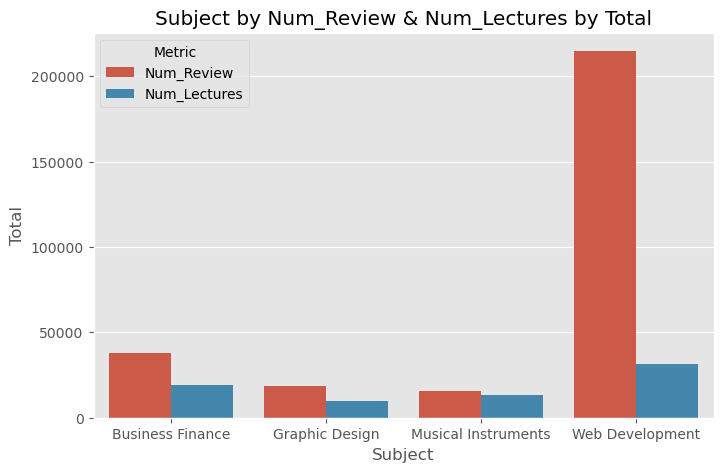

In [41]:
# Visualise the Subject category against the other categories
sub2 = df.groupby(['Subject','Course_Type'])[['Num_Review', 'Num_Lectures']].sum().reset_index()

sub3 = pd.melt(sub2, id_vars=['Subject','Course_Type'], var_name='Metric', value_name='Total')
plt.figure(figsize=(8,5))
plt.title('Subject by Num_Review & Num_Lectures by Total')
sns.barplot(data=sub3, x='Subject', y='Total', hue='Metric', ci=None);

### In Web development subjects, there are more number of reviews than the rest of the subjects. Number of lectures across each subjects are not significantly different from one another

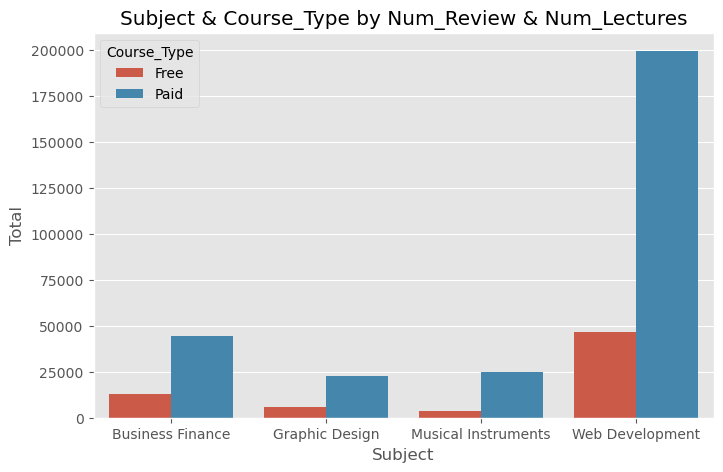

In [42]:
plt.figure(figsize=(8,5))
plt.title('Subject & Course_Type by Num_Review & Num_Lectures')
sns.barplot(data=sub3, x='Subject', y='Total', hue='Course_Type', ci=None);

### Web development subject have a significant numbers that are paid for than free. All other subjcts are not the same.

In [43]:
# Revenue Analysis Analysis
rev = df.groupby('Year_pulished')['Revenue'].sum().reset_index()
rev

,Year_pulished,Revenue
0,2011,11643420
1,2012,11773470
2,2013,69405820
3,2014,106939045
4,2015,314510395
5,2016,276633190
6,2017,90769600


In [44]:
# Compute Rate of Change of Revenue from between 2015 & 2017
Rev_x = round(((90769600 - 314510395) / 314510395) * 100, 1)
Rev_x_with_percent = str(Rev_x) + '%'
Rev_x_with_percent

'-71.1%'

In [45]:
# Price Analysis
pri = df.groupby('Year_pulished')['Price'].mean().reset_index()
pri

,Year_pulished,Price
0,2011,62.000000
1,2012,40.777778
2,2013,53.656716
3,2014,48.530612
4,2015,66.893491
5,2016,69.904485
6,2017,75.771388


In [46]:
# Compute Rate of Change of Average Price from between 2015 & 2017
Av_price = round(((75.77 - 66.89) / 66.89) * 100, 1)
Av_price_with_percent = str(Av_price) + '%'
Av_price_with_percent

'13.3%'

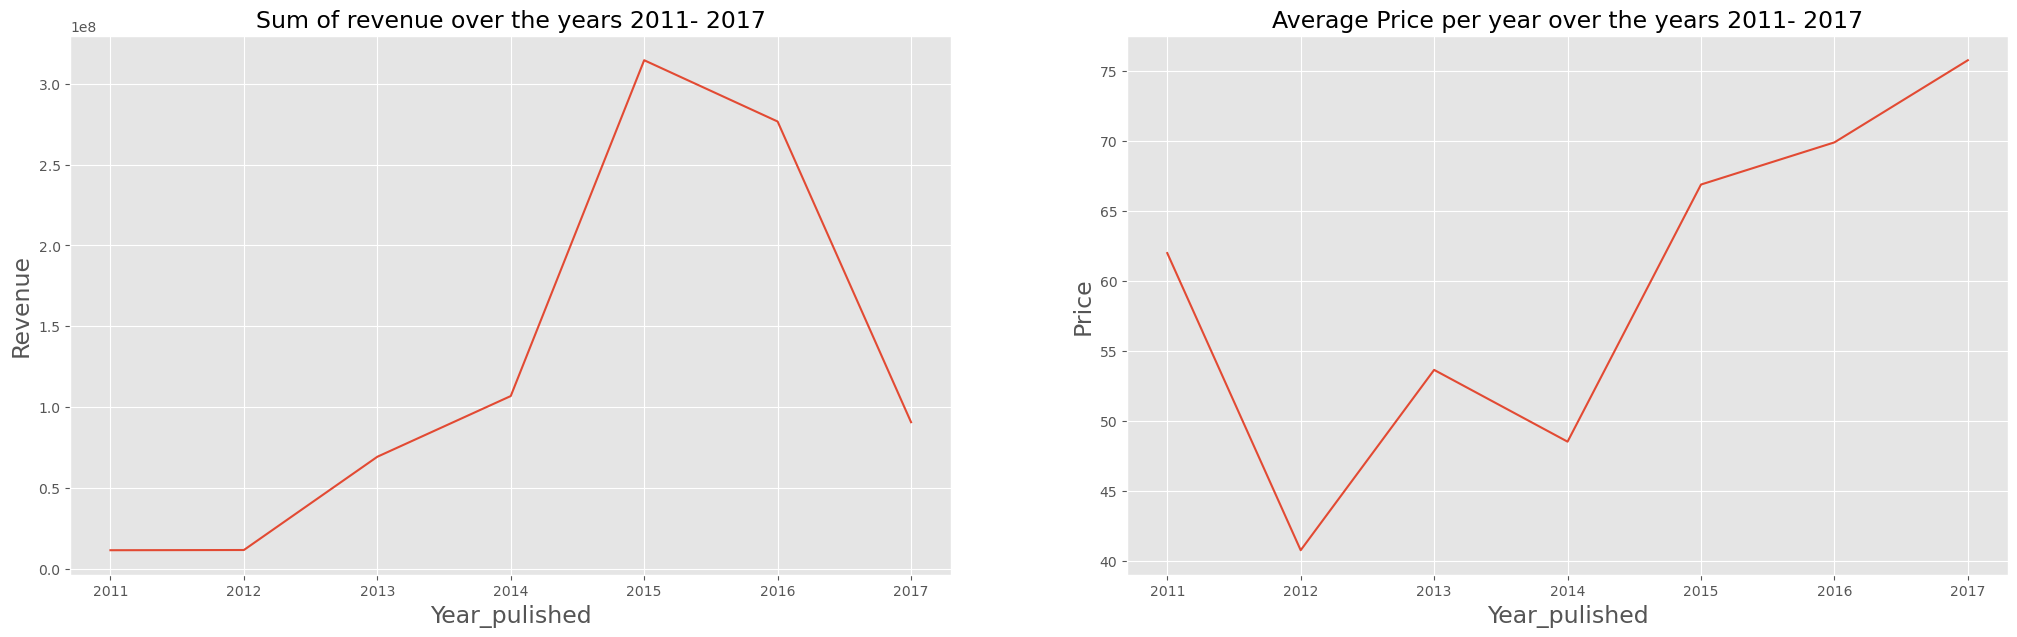

In [47]:
# Revenue Analysis and Price Analysis
fig, axs = plt.subplots(1,2, figsize = (25,7))

axs[0].set_title('Sum of revenue over the years 2011- 2017', fontsize=17)
plt1 = sns.lineplot(x = 'Year_pulished', y='Revenue',data=rev, ax = axs[0])

axs[1].set_title('Average Price per year over the years 2011- 2017', fontsize=17)
plt2 = sns.lineplot(x= 'Year_pulished', y= 'Price', data=pri, ax = axs[1])

# Increase the label font size
plt1.set_xlabel('Year_pulished', fontsize=17)
plt1.set_ylabel('Revenue', fontsize=17)

plt2.set_xlabel('Year_pulished', fontsize=17)
plt2.set_ylabel('Price', fontsize=17);

### EdSigh experienced a rapid growth from 2012 up untill 2015. The revenue declined a little in 2016, but further experienced a sharp drop very significant in 2017. This could be as a result of increase in prices in the period from 2015 to 2017

In [48]:
# Subscription and Rating Analysis

subs = df.groupby('Year_pulished')['Num_Subscribers'].sum().reset_index()
ratg = df.groupby('Year_pulished')['Rating'].mean().reset_index()

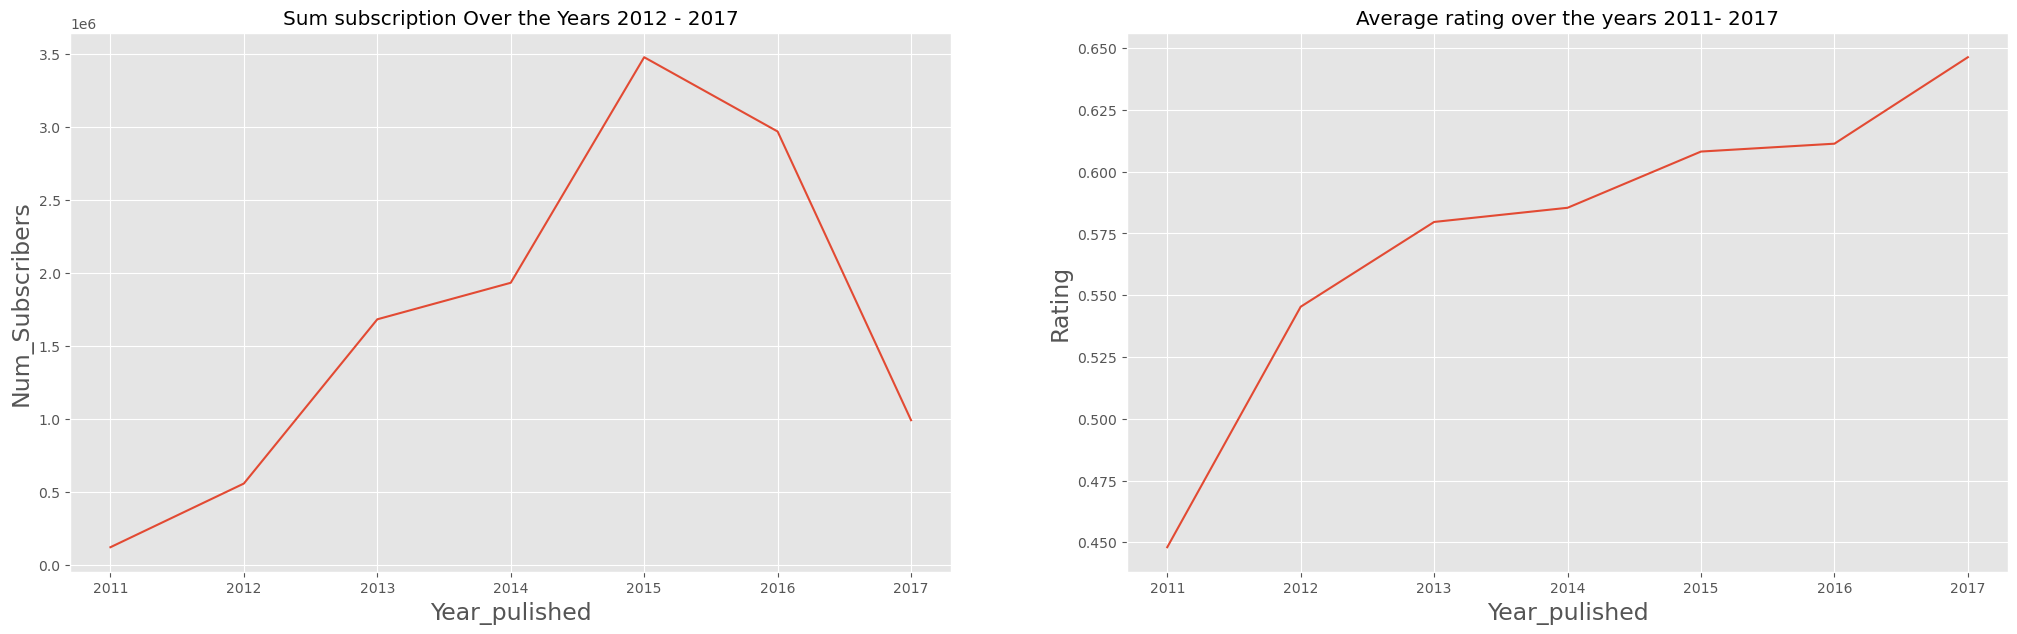

In [49]:
# Subscription Analysis and Rating Analysis over the Years
fig, axs = plt.subplots(1,2, figsize = (25,7))

axs[0].set_title('Sum subscription Over the Years 2012 - 2017')
plt1 = sns.lineplot(x = 'Year_pulished', y='Num_Subscribers',data=subs, ax = axs[0])

axs[1].set_title('Average rating over the years 2011- 2017')
plt2 = sns.lineplot(x= 'Year_pulished', y= 'Rating', data=ratg, ax = axs[1])

# Increase the label font size
plt1.set_xlabel('Year_pulished', fontsize=17)
plt1.set_ylabel('Num_Subscribers', fontsize=17)

plt2.set_xlabel('Year_pulished', fontsize=17)
plt2.set_ylabel('Rating', fontsize=17);


### The average no of subsribers are declining per year, although the average rating is increaing

In [50]:
# Num_Review and Num_Lectures Analysis

num_r = df.groupby('Year_pulished')['Num_Review'].sum().reset_index()
num_L = df.groupby('Year_pulished')['Num_Lectures'].sum().reset_index()

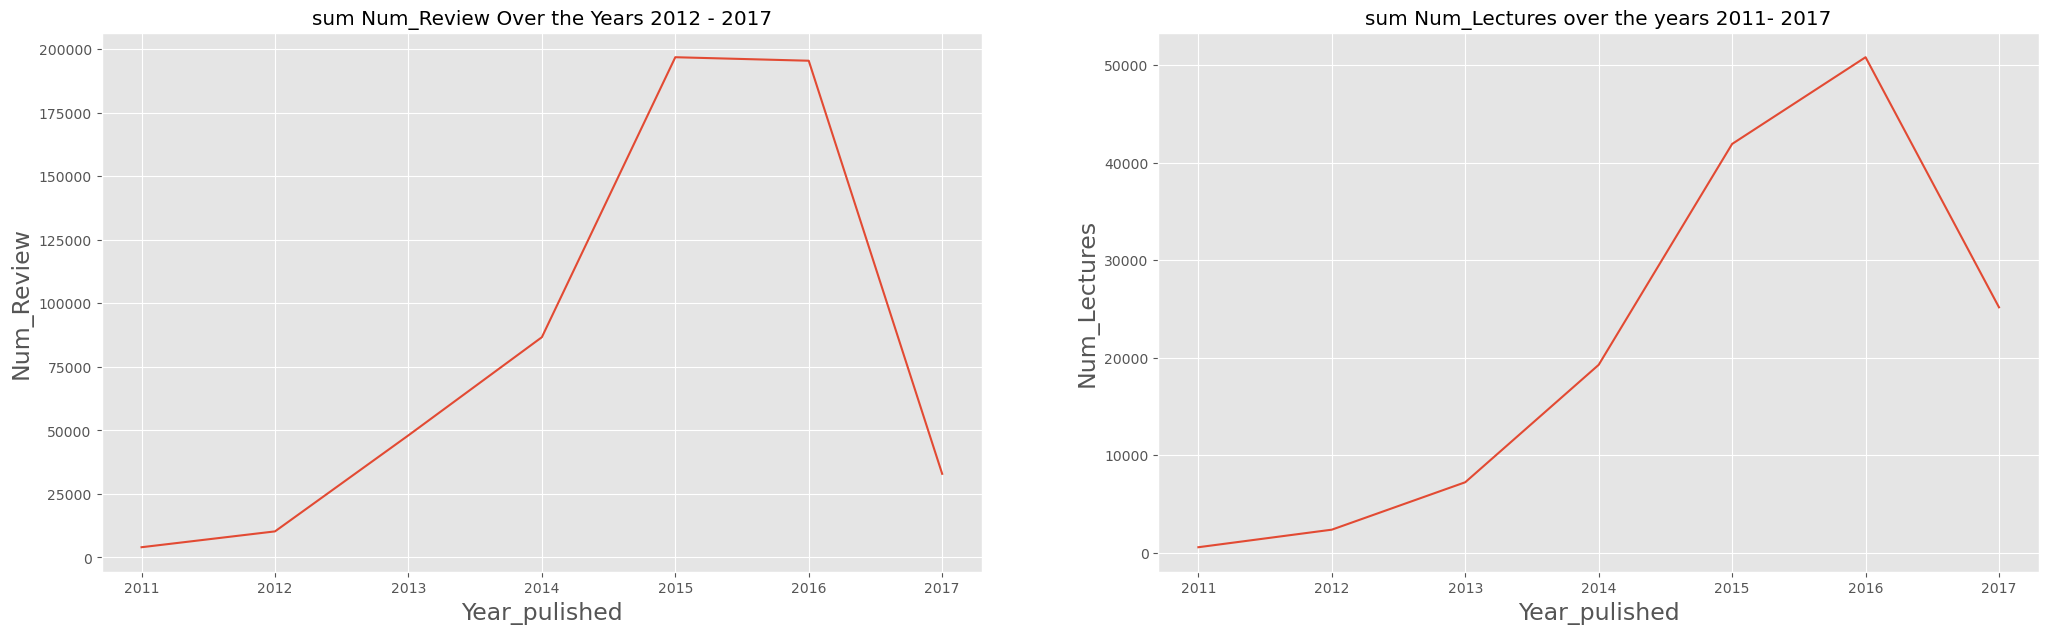

In [51]:
# Number of Reviews & lectures

# Subscription Analysis and Rating Analysis over the Years
fig, axs = plt.subplots(1,2, figsize = (25,7))

axs[0].set_title('sum Num_Review Over the Years 2012 - 2017')
plt1 = sns.lineplot(x = 'Year_pulished', y='Num_Review',data=num_r, ax = axs[0])

axs[1].set_title('sum Num_Lectures over the years 2011- 2017')
plt2 = sns.lineplot(x= 'Year_pulished', y= 'Num_Lectures', data=num_L, ax = axs[1])

# Increase the label font size
plt1.set_xlabel('Year_pulished', fontsize=17)
plt1.set_ylabel('Num_Review', fontsize=17)

plt2.set_xlabel('Year_pulished', fontsize=17)
plt2.set_ylabel('Num_Lectures', fontsize=17);


### Both the sum figures of number_of_reviews & lectures is declining

In [52]:
con_L = df.groupby('Year_pulished')['Content_Duration'].sum().reset_index()

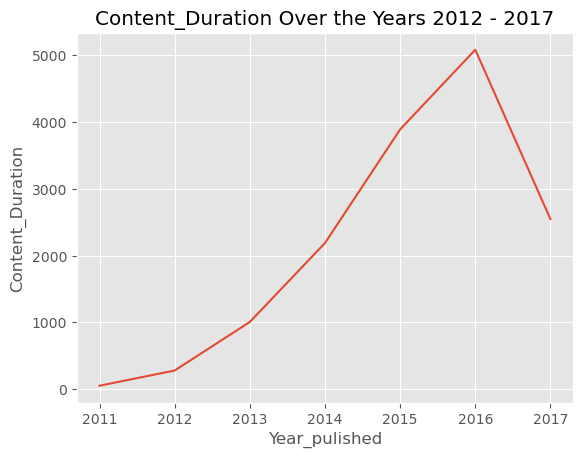

In [53]:
# Content Duration Analysis Analysis
plt.title('Content_Duration Over the Years 2012 - 2017')
sns.lineplot(x='Year_pulished', data=con_L, y='Content_Duration');

### The average content durations are also on the decline in our dataset

## Why did Revenue Increase from 2014 - 2016 ?

### Investigate why revenue and most other Parameters Started to drop  after 2016. Investigate 2015 and 2016 when Revenue was the Highest

In [54]:
filt_df = df[(df['Year_pulished'] >= 2014) & (df['Year_pulished'] <= 2016)]

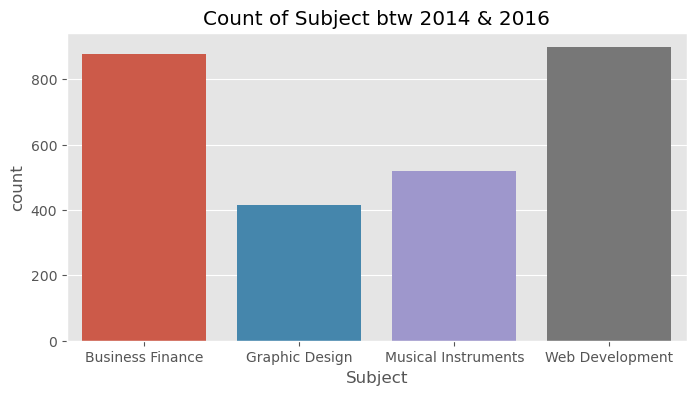

In [55]:
plt.figure(figsize=(8,4))
plt.title('Count of Subject btw 2014 & 2016')
sns.countplot(x='Subject', data=filt_df);

### No significant difference from the initial analysis of overal count of subjects with between year 2014 to 2016

In [56]:
# Checking if the Revenue was different from the initial overal Revenue per subject
sub_2014 = filt_df.groupby(['Subject'])[['Revenue']].sum().reset_index()
sub_2014

,Subject,Revenue
0,Business Finance,105300585
1,Graphic Design,55176495
2,Musical Instruments,40721760
3,Web Development,496883790


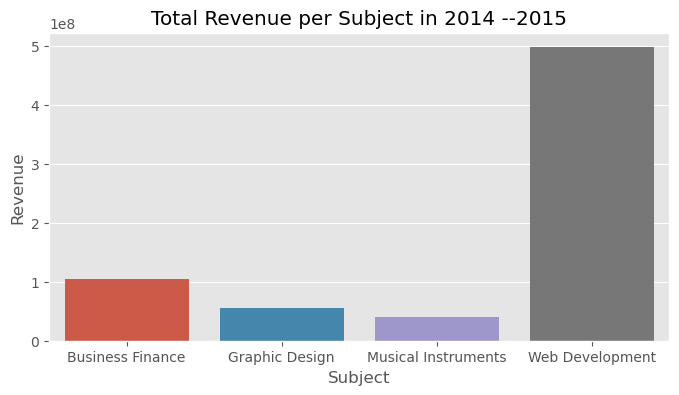

In [57]:
# Visualisation
plt.figure(figsize=(8,4))
plt.title('Total Revenue per Subject in 2014 --2015')
sns.barplot(x='Subject', y='Revenue', data=sub_2014);


## Finally, we shall check the Pattern of Course Published Per Year


In [58]:
# Count of Unique courses published Per Year from 2011 to 2017
courses_per_year = df.groupby('Year_pulished')['Course_ID'].nunique().reset_index()
courses_per_year

,Year_pulished,Course_ID
0,2011,5
1,2012,45
2,2013,201
3,2014,490
4,2015,1014
5,2016,1204
6,2017,713


In [59]:
# Compute Rate of Change unique Courses Published between 2015 & 2017
red = round(((713 - 1014) / 1014) * 100, 1)
red_with_percent = str(red) + '%'
red_with_percent

'-29.7%'

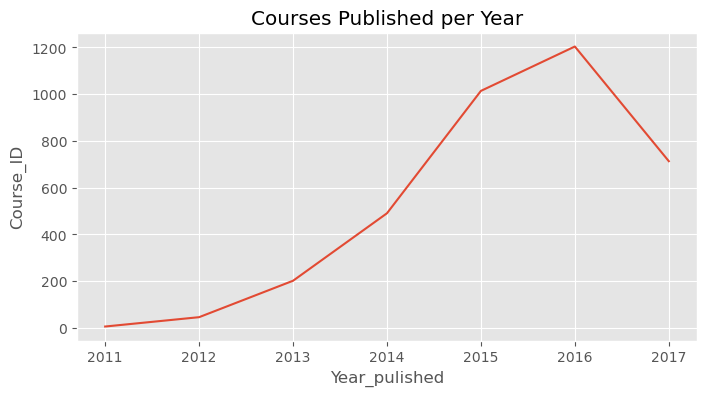

In [60]:
# Visualise
plt.figure(figsize=(8,4))
plt.title('Courses Published per Year')
sns.lineplot(x='Year_pulished', y='Course_ID', data=courses_per_year);

### The Number of courses published per month has followed the same pattern as above.

## Conclusion and Recommendations
- Based on our exploratory data analysis (EDA), we have gained several insights and observations:

- The numerical data showed that the price variable was positively skewed, with a median price of 45. The number of reviews was negatively skewed, and the month of publication followed a normal distribution, with a median of 6. No outliers were detected in these variables.

- The presence of a substantial number of free courses across all subjects allows subscribers to sample the content before committing to paid courses. Business finance and web development offered a wide range of subjects for subscription, indicating their popularity.

- Web development and business courses accounted for the highest number of available courses, while graphic design and musical instruments had the lowest representation.

- Although business finance subjects received high ratings, they had higher prices and lower numbers of reviews compared to web development courses. As a result, the revenue generated from business finance subjects was not as substantial as expected, given their high representation.

- The number of unique courses published showed a consistent increase from 2011 to 2016, resulting in significant revenue growth during those years. However, in 2017, there was a notable decrease in course availability, accompanied by an increase in average prices. This led to a decline in revenue for the company.

- In 2016, there was a record-high number of course publications (1,204), following the all-time revenue high in 2015. However, the revenue then experienced a drastic 71% drop, along with a 30% decrease in the number of courses published. This period also saw a 13% increase in course prices. The number of lectures and content duration followed a similar declining pattern.

- The revenue of the company is highly dependent on the number of unique courses published, reviews, and prices. Therefore, these metrics need to be carefully considered and managed to avoid negative impacts on revenue.

- Encouragingly, the ratings for Ed-Tech continued to improve throughout the analyzed periods. This indicates that, once the other dependent factors are properly addressed by management, there is potential for revenue recovery and growth.

- Based on these insights, we recommend that the company focuses on diversifying its course offerings, paying attention to price points, and ensuring a sufficient number of courses are published to maintain revenue growth. Additionally, management should explore strategies to encourage more reviews from subscribers and carefully evaluate pricing strategies to strike a balance between profitability and maintaining customer interest.


## Conclusion.
- In conclusion, our exploratory data analysis (EDA) of Ed-Sigh EdTech's dataset has provided valuable insights into various aspects of the company's operations. Here are the key findings:

- The company offers a diverse range of courses across different subjects, with web development and business finance being the most prominent. However, despite the high availability of business finance courses and good ratings, they did not generate significant revenue. This suggests that the subscriber base may have a stronger inclination towards technology-related courses.

- The revenue of the company is closely tied to the number of unique courses published, reviews, and prices. To maximize revenue, it is crucial for Ed-Sigh to carefully consider these factors and strike a balance that attracts subscribers while maintaining profitability.

- From 2011 to 2016, the company experienced consistent growth in both the number of courses published and revenue. However, in 2017, there was a decline in course availability and an increase in average prices, leading to a drop in revenue. This emphasizes the importance of monitoring and managing these metrics to sustain growth.

- Based on these findings, we recommend that Ed-Sigh EdTech capitalizes on its strength in technology-related courses. By focusing on providing up-to-date courses with unique and high-quality content in the technology field, the company can establish itself as the go-to platform for tech certifications. This strategic direction may align more effectively with the preferences of the subscriber base, ultimately driving revenue growth.

- Furthermore, it is advisable for the company to continuously evaluate pricing strategies, ensuring they remain competitive and attractive to subscribers. Encouraging and incentivizing reviews from subscribers can also play a vital role in building credibility and trust in the platform.

- By leveraging these insights and recommendations, Ed-Sigh EdTech has the potential to further solidify its position in the market, attract more subscribers, and drive sustainable revenue growth in the future.

## Time Series Analysis

In [231]:
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type',
       'Year_pulished', 'Month_published', 'Month_name_published',
       'Day_name_published', 'Quarter_published', 'Season', 'Revenue'],
      dtype='object')

In [232]:
# Convert 'Published_Timestamp' to datetime type and remove timezone
df['Published_Timestamp'] = pd.to_datetime(df['Published_Timestamp']).dt.tz_localize(None)
df.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Year_pulished,Month_published,Month_name_published,Day_name_published,Quarter_published,Season,Revenue
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20 02:25:22,Business Finance,2013-04-20,Free,2013,4,April,Saturday,2,Spring,0
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07 21:39:25,Business Finance,2013-04-07,Free,2013,4,April,Sunday,2,Spring,0


In [233]:
# Filter Date Published and Revenue 
df1 = df[['Date_Published','Revenue']]
df1.head(10)

,Date_Published,Revenue
0,2013-04-20,0
1,2013-04-07,0
2,2013-12-25,0
3,2014-05-27,0
4,2016-01-21,4773795
5,2013-10-16,0
6,2014-11-25,4340115
7,2014-10-27,4039000
8,2014-04-23,0
9,2014-03-31,0


In [234]:
# Ensure our Date is in Date Format
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3675
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date_Published  3672 non-null   datetime64[ns]
 1   Revenue         3672 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 86.1 KB


In [235]:
# Drop rows with 'Revenue' equal to 0 where course was Free for all.
df1 = df1[df1['Revenue'] != 0]
df1

,Date_Published,Revenue
4,2016-01-21,4773795
6,2014-11-25,4340115
7,2014-10-27,4039000
12,2014-12-12,3295500
13,2014-09-02,983100
...,...,...
3671,2017-05-29,10000
3672,2017-07-06,1760
3673,2017-06-11,4250
3674,2017-06-15,2500


In [236]:
#Set the Published time stamp as index for forecasting
df2 = df1.set_index('Date_Published', drop=True)
df2

,Revenue
Date_Published,
2016-01-21,4773795
2014-11-25,4340115
2014-10-27,4039000
2014-12-12,3295500
2014-09-02,983100
...,...
2017-05-29,10000
2017-07-06,1760
2017-06-11,4250


In [237]:
# Sort the dataframe in ascending rder
df2.sort_index(axis=0, inplace=True)  # Sorting in ascending order
df2

,Revenue
Date_Published,
2011-07-09,73940
2011-09-09,249160
2011-11-19,8302320
2011-11-29,350700
2011-12-20,2667300
...,...
2017-07-04,960
2017-07-04,525
2017-07-05,200


In [238]:
# Resample revenue to Weekly and take the Sum
df2 = df2.resample('M').sum()
df2

,Revenue
Date_Published,
2011-07-31,73940
2011-08-31,0
2011-09-30,249160
2011-10-31,0
2011-11-30,8653020
...,...
2017-03-31,20726470
2017-04-30,6887050
2017-05-31,10705375


In [239]:
# Filter out Rows with Zero.
df2 = df2[df2['Revenue'] != 0]
df2

,Revenue
Date_Published,
2011-07-31,73940
2011-09-30,249160
2011-11-30,8653020
2011-12-31,2667300
2012-01-31,4165
...,...
2017-03-31,20726470
2017-04-30,6887050
2017-05-31,10705375


In [440]:
#df2.dropna(subset=['Revenue'], inplace=True)
#df2

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_14000\329502833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['Revenue'], inplace=True)


,Revenue
Date_Published,
2011-07-31,73940
2011-09-30,249160
2011-11-30,8653020
2011-12-31,2667300
2012-01-31,4165
...,...
2017-03-31,20726470
2017-04-30,6887050
2017-05-31,10705375


In [338]:
# Remove the Zeros in the Revenue
#df2 = df2[df2['Revenue'] != 0]
#df2

,Revenue
Published_Timestamp,
2011-07-09 05:00:00,73940.0
2011-09-09 15:00:00,249160.0
2011-11-19 21:00:00,8302320.0
2011-11-29 01:00:00,350700.0
2011-12-20 15:00:00,2667300.0
...,...
2017-07-04 18:00:00,960.0
2017-07-04 22:00:00,525.0
2017-07-05 19:00:00,200.0


1.4296411294440927
2.1003660398360635


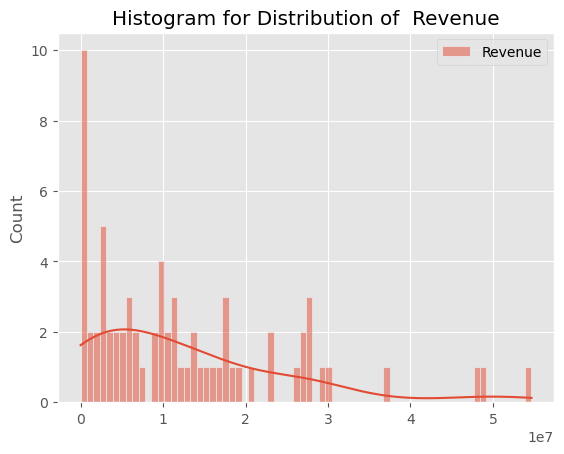

In [240]:
# Understanding our data to see the distribution of the revenue
sns.histplot(df2, kde=True, bins=70)
plt.title('Histogram for Distribution of  Revenue')
print(df2['Revenue'].skew())
print(df2['Revenue'].kurtosis());

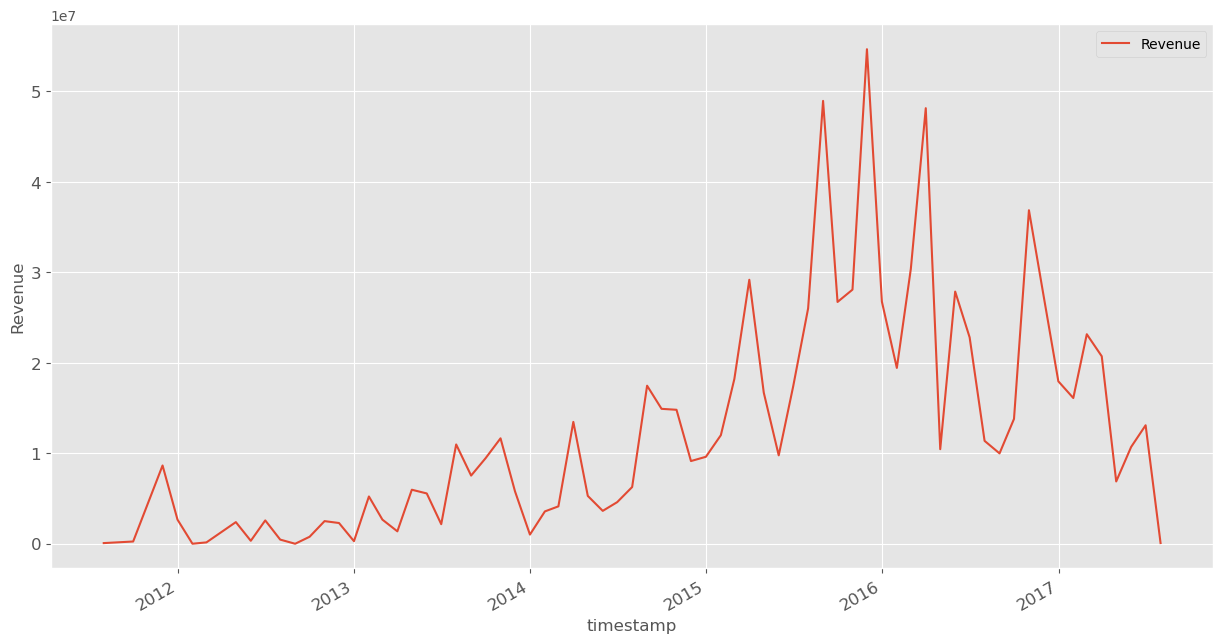

In [241]:
# Plot all the available Revenue data from July 2011 to July 2017.
df2.plot(y='Revenue', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

In [242]:
# Create A function to check if our Data is Stationary or not
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'. format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('strong evidence against the null hypothesis, reject the null hypothesis, Data has no unit root and its stationary')
    else:
        print('weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary')

In [243]:
adf_test(df2['Revenue'])

ADF Statistics: -1.7084987407551053
p-value: 0.42673907541889883
weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


### ACF & PACF for Non Stationary Data

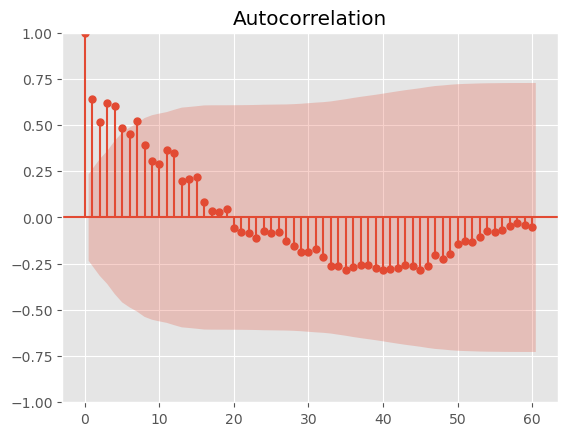

In [244]:
from statsmodels.graphics.tsaplots import plot_acf
acf_plot = plot_acf(df2.Revenue, lags=60)
plt.show();

### ACF & PACF for  Stationary Data

C:\Users\HENRY OKEOMA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


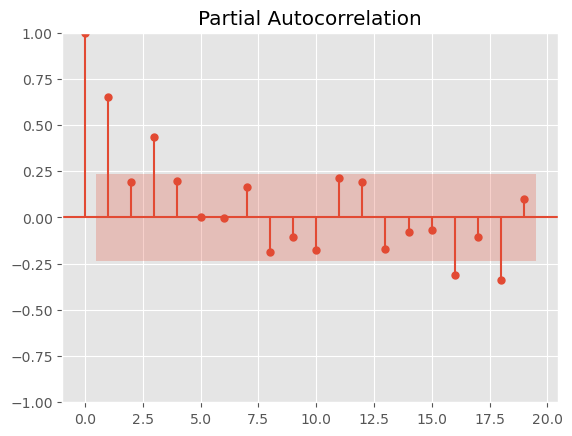

In [245]:
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot = plot_pacf(df2.Revenue)

In [246]:
#import statsmodels.api as sm
#p, d and q = 2, 0, 0
#model = sm.tsa.ARIMA(df1['Revenue'], order=(2, 0, 0))
#model_fit = model.fit()

In [384]:
#model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 3297
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -49341.251
Date:                Fri, 04 Aug 2023   AIC                          98690.501
Time:                        20:01:50   BIC                          98714.904
Sample:                             0   HQIC                         98699.237
                               - 3297                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.674e+05   1.19e-11   2.25e+16      0.000    2.67e+05    2.67e+05
ar.L1          0.5019      0.002    265.795      0.000       0.498       0.506
ar.L2          0.2464      0.002    121.643      0.000       0.242       0.250
sigma2      5.806e+11   1.12e-15   5.18e+26      0.000    5.81e+11    5.81e+11
===================================================================================
Ljung-Box (L1) (Q):                  24.09   Jarque-Bera (JB):          24005845.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.00   Skew:                            11.47
Prob(H) (two-sided):                  0.00   Kurtosis:                       420.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.27e+36. Standard errors may be unstable.
"""

### Differencing

In [247]:
df2['Revenue first Difference'] = df2['Revenue'] - df2['Revenue'].shift(1)
df2

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_1788\1420659760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Revenue first Difference'] = df2['Revenue'] - df2['Revenue'].shift(1)


,Revenue,Revenue first Difference
Date_Published,,
2011-07-31,73940,NaN
2011-09-30,249160,175220.0
2011-11-30,8653020,8403860.0
2011-12-31,2667300,-5985720.0
2012-01-31,4165,-2663135.0
...,...,...
2017-03-31,20726470,-2435535.0
2017-04-30,6887050,-13839420.0
2017-05-31,10705375,3818325.0


In [248]:
# Conduct a seasonal shiift for 12months, but we resampled for a year this will 52weeks in a year
df2['Revenue seasonal Difference'] = df2['Revenue'] - df2['Revenue'].shift(12)
df2

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_1788\1161835638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Revenue seasonal Difference'] = df2['Revenue'] - df2['Revenue'].shift(12)


,Revenue,Revenue first Difference,Revenue seasonal Difference
Date_Published,,,
2011-07-31,73940,NaN,NaN
2011-09-30,249160,175220.0,NaN
2011-11-30,8653020,8403860.0,NaN
2011-12-31,2667300,-5985720.0,NaN
2012-01-31,4165,-2663135.0,NaN
...,...,...,...
2017-03-31,20726470,-2435535.0,-27423560.0
2017-04-30,6887050,-13839420.0,-3569105.0
2017-05-31,10705375,3818325.0,-17172255.0


<AxesSubplot:xlabel='Date_Published'>

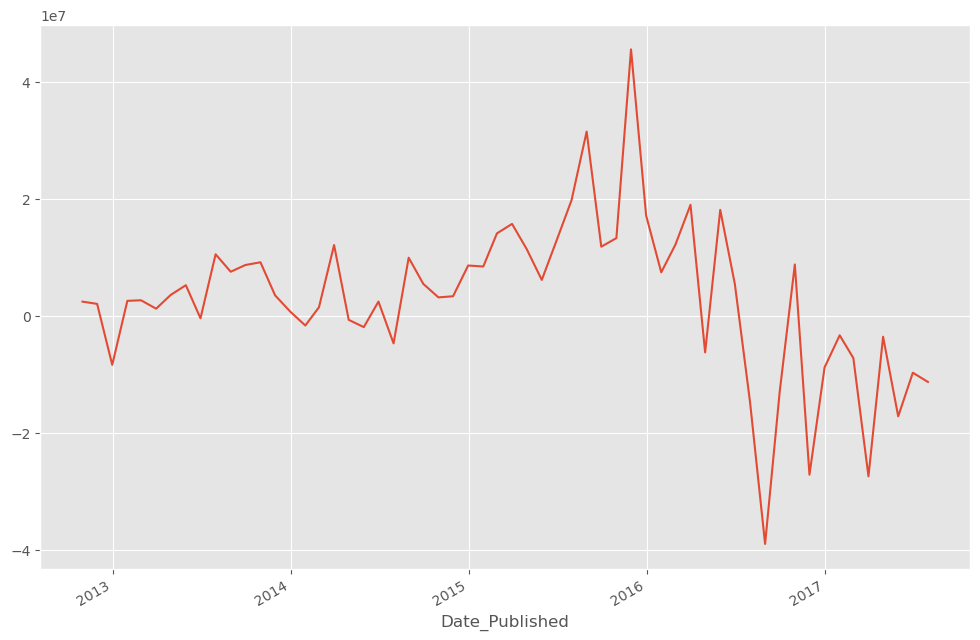

In [249]:
# make the Data Stationary a above and visualise the seasonal differences
df2['Revenue seasonal Difference'].plot(figsize=(12,8))

In [250]:
# Check if the Data is now stationary
adf_test(df2['Revenue seasonal Difference'].dropna())

ADF Statistics: -2.9197766153105036
p-value: 0.04309610673032692
strong evidence against the null hypothesis, reject the null hypothesis, Data has no unit root and its stationary


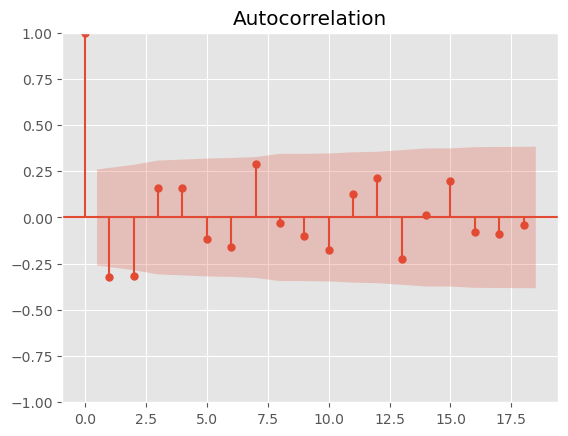

In [251]:
# Plot the Autocorrelation and Partial Autocorrelation to determine the optimum values for p,d and q
acf_plot = plot_acf(df2['Revenue first Difference']. iloc[13:])


#### Decomposition after 2, we can call our q = 2

C:\Users\HENRY OKEOMA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


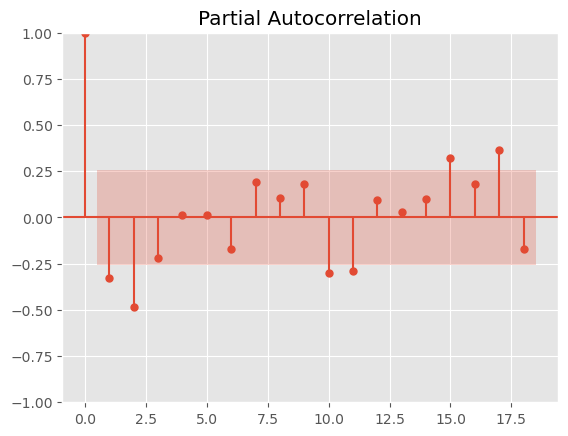

In [252]:
acf_plot = plot_pacf(df2['Revenue first Difference'].iloc[13:])

#### Our p = 2 and differencing = 1 & for seasonality = 12

### Implement the SARIMAX Model - AutoRegression

## Implement SARIMAX
- Here we shall follow the below steps:

- Define the model by calling SARIMAX() and passing in the model parameters: p, d, and q parameters, and P, D, and Q parameters.
- Prepare the model for the training data by calling the fit() function.
- Make predictions calling the forecast() function and specifying the number of steps (the horizon) to forecast.

#### for Clarity,
- p: the parameter associated with the auto-regressive aspect of the model, which incorporates past values. 
- d: the parameter associated with the integrated part of the model, which affects the amount of differencing to apply to a time series. 
- q: the parameter associated with the moving-average part of the model.

- But Again, our data has seasonalities, hence we shall use the seasonal ARIMA which is the SARIMA (Seasonal Autoregressive Integrated Moving Average) which also take P, D, & Q for the seasonality factors

In [259]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df2['Revenue'], order=(2, 1, 2), seasonal_order=(2, 1, 2,12))
results = model.fit()

C:\Users\HENRY OKEOMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HENRY OKEOMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HENRY OKEOMA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


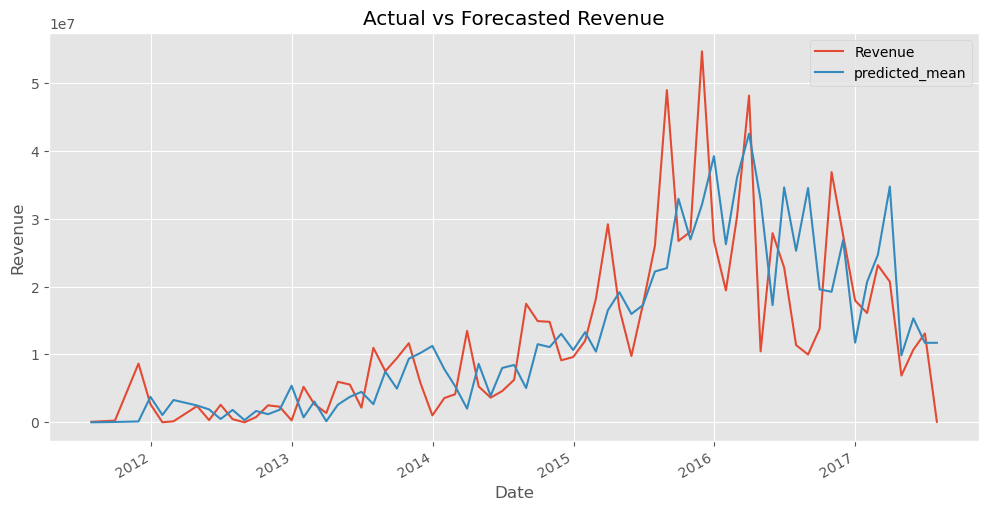

In [281]:
df2['Revenue'].plot(figsize=(12,6))
results.predict().plot()
plt.title('Actual vs Forecasted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [261]:
print('MAE:', np.sqrt(mean_squared_error(df2['Revenue'], results.predict())))
print('MAPE: {:.2f}'.format(mean_absolute_percentage_error(df2['Revenue'], results.predict())))

MAE: 8333379.964896676
MAPE: 12.77


C:\Users\HENRY OKEOMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


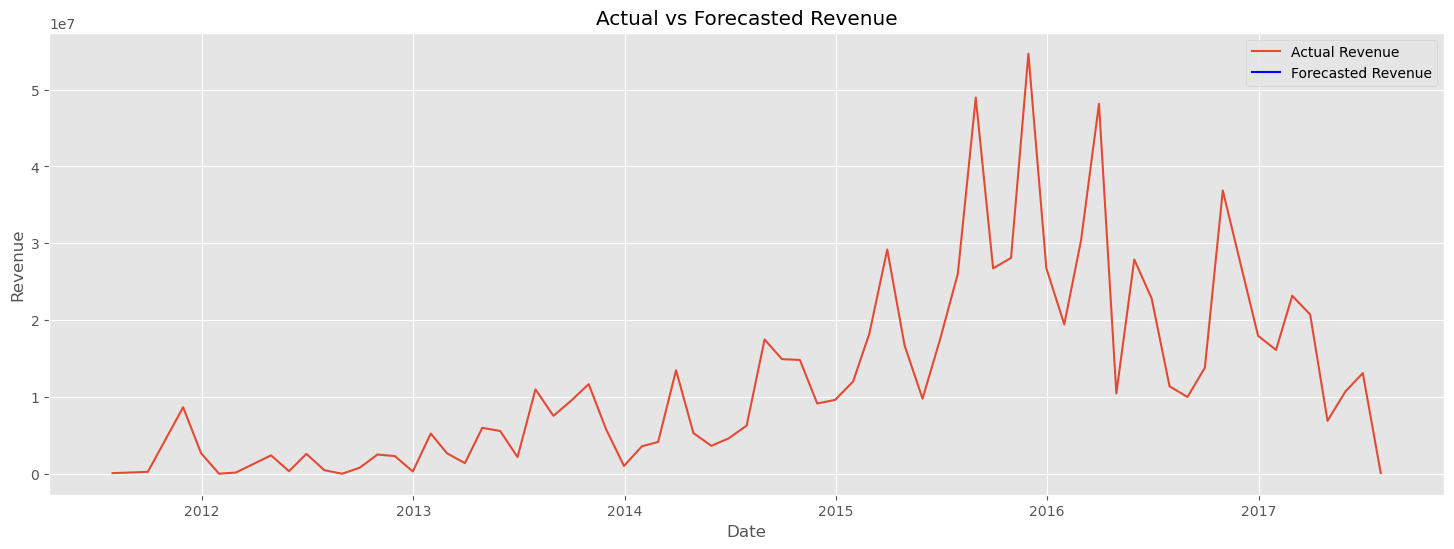

In [293]:
# Generate forecasted values for one year
forecast_start = '2017-08-01'
forecast_end = '2019-07-31'
forecast_steps = (pd.to_datetime(forecast_end) - pd.to_datetime(forecast_start)).days + 1

forecasted_values = results.get_forecast(steps=forecast_steps).predicted_mean

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecasted_values}, index=pd.date_range(start=forecast_start, end=forecast_end))

# Plot the actual 'Revenue' and the forecasted values
plt.figure(figsize=(18, 6))
plt.plot(df2.index, df2['Revenue'], label='Actual Revenue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Revenue', color='blue')

# Highlight negative regions with shading
for i in range(len(forecast_df) - 1):
    if forecast_df['Forecast'][i] < 0 or forecast_df['Forecast'][i + 1] < 0:
        plt.axvspan(forecast_df.index[i], forecast_df.index[i + 1], color='gray', alpha=0.3)

plt.title('Actual vs Forecasted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

### Not Displayed its tending toward the negatives.

### On A Separate Note Book, I used Facebook Prophet to display the Time Series